In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

file_path = ''
data = pd.read_csv(file_path)
data.head()


,region_id,pet_type_id,count
0,강남구,골든 리트리버,380
1,강남구,그레이 하운드,23
2,강남구,그레이트 덴,3
3,강남구,그레이트 피레니즈,7
4,강남구,기타,519


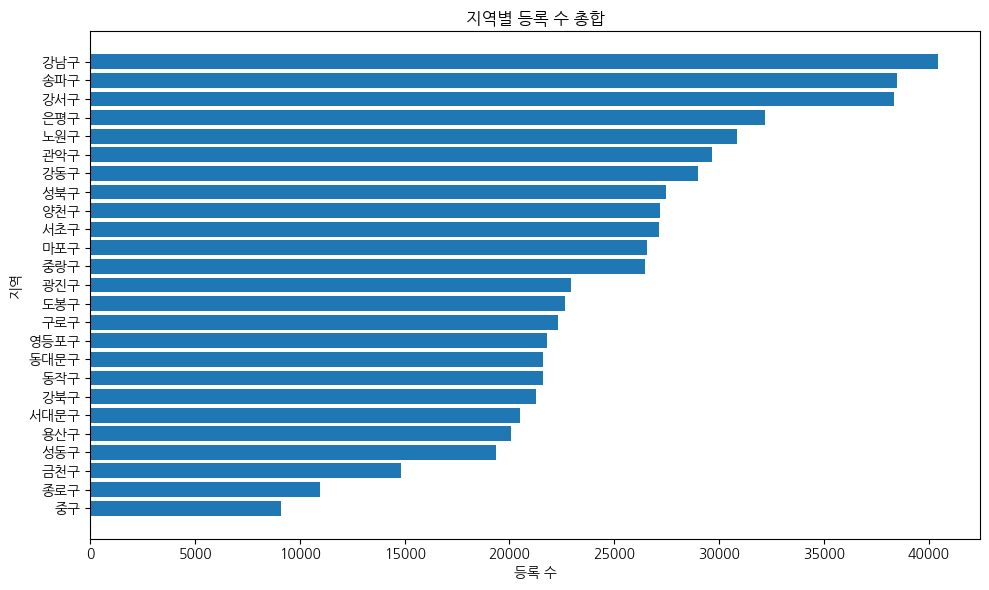

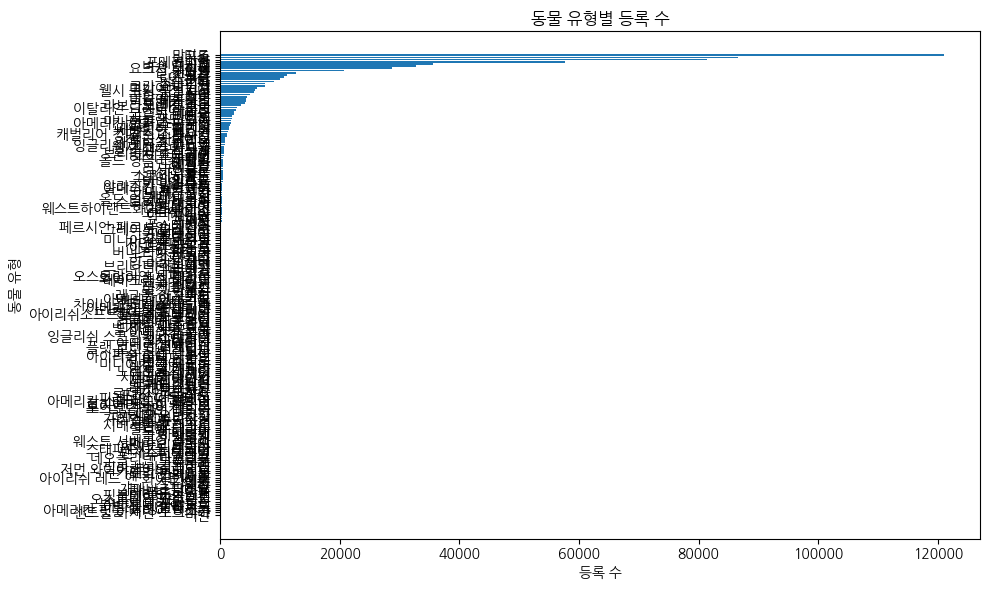

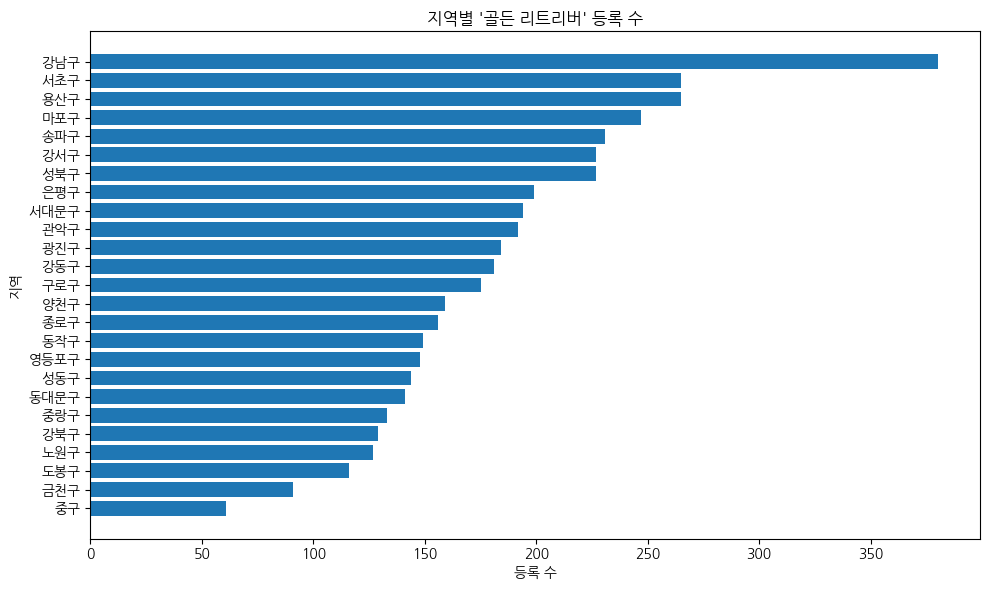

In [2]:
import matplotlib.pyplot as plt

# 1. 지역별 등록 수 총합
region_sum = data.groupby('region_id')['count'].sum().sort_values()
plt.figure(figsize=(10, 6))
plt.barh(region_sum.index, region_sum.values)
plt.title("지역별 등록 수 총합")
plt.xlabel("등록 수")
plt.ylabel("지역")
plt.tight_layout()
plt.show()

# 2. 동물 유형별 등록 수
pet_type_sum = data.groupby('pet_type_id')['count'].sum().sort_values()
plt.figure(figsize=(10, 6))
plt.barh(pet_type_sum.index, pet_type_sum.values)
plt.title("동물 유형별 등록 수")
plt.xlabel("등록 수")
plt.ylabel("동물 유형")
plt.tight_layout()
plt.show()

# 3. 지역별 특정 동물 유형 (예: '골든 리트리버') 등록 분포
golden_retriever = data[data['pet_type_id'] == '골든 리트리버']
golden_retriever_sum = golden_retriever.groupby('region_id')['count'].sum().sort_values()
plt.figure(figsize=(10, 6))
plt.barh(golden_retriever_sum.index, golden_retriever_sum.values)
plt.title("지역별 '골든 리트리버' 등록 수")
plt.xlabel("등록 수")
plt.ylabel("지역")
plt.tight_layout()
plt.show()


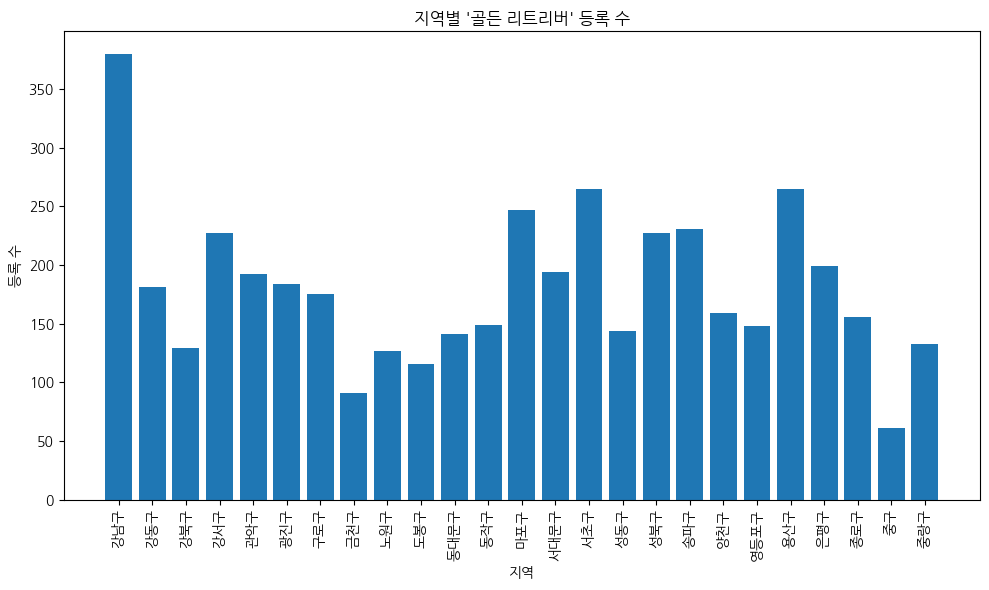

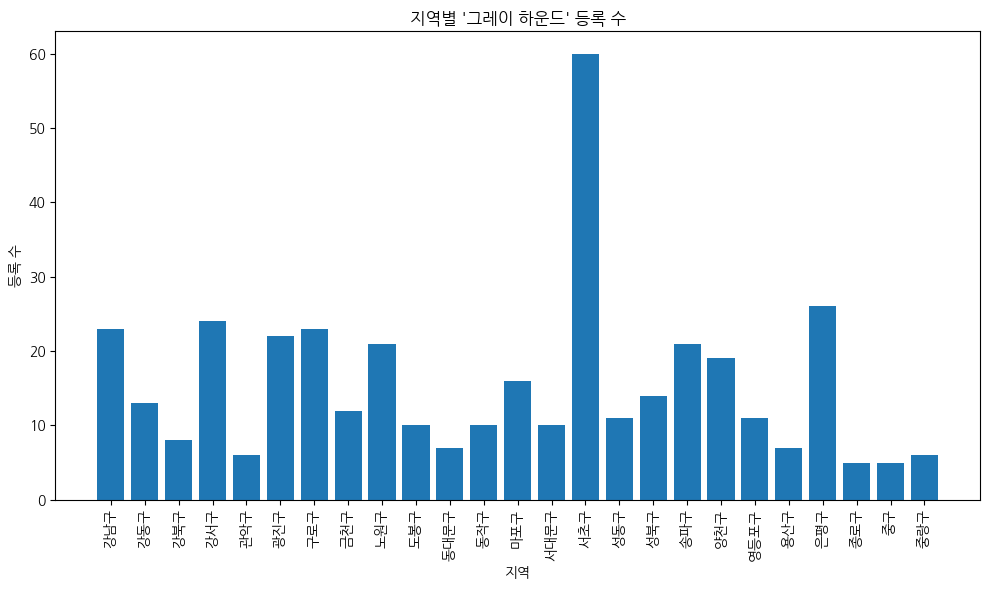

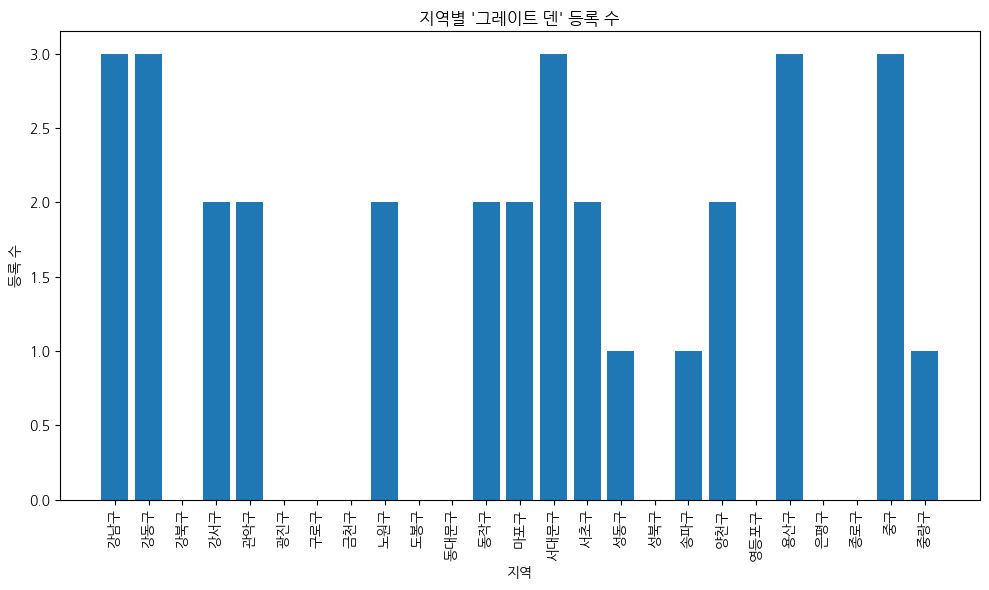

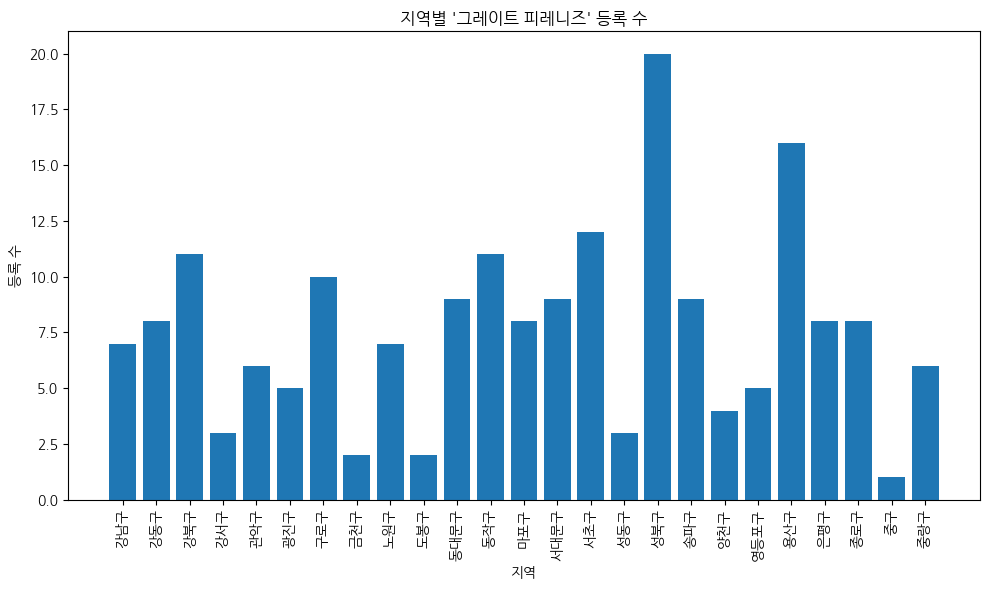

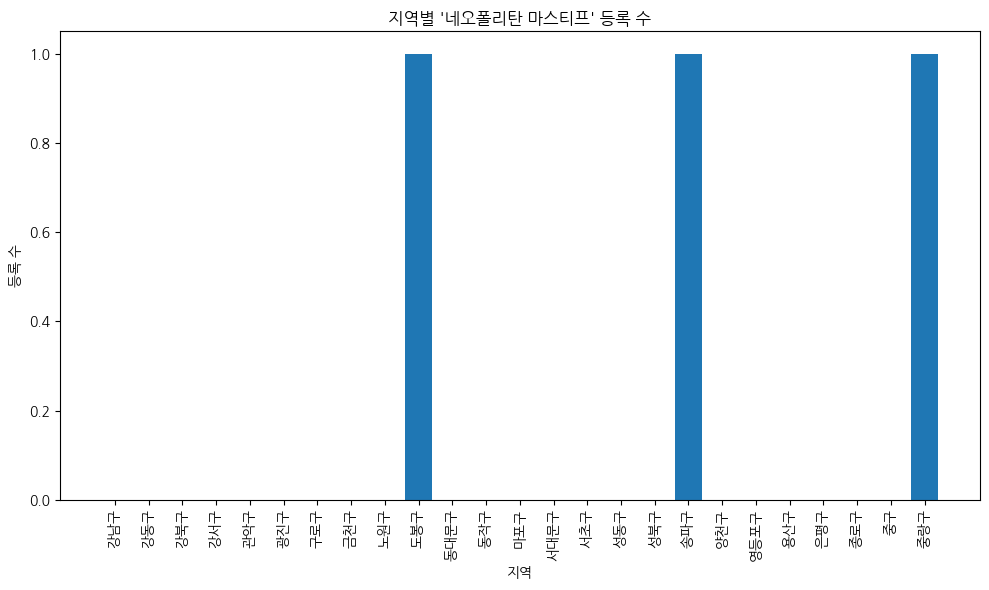

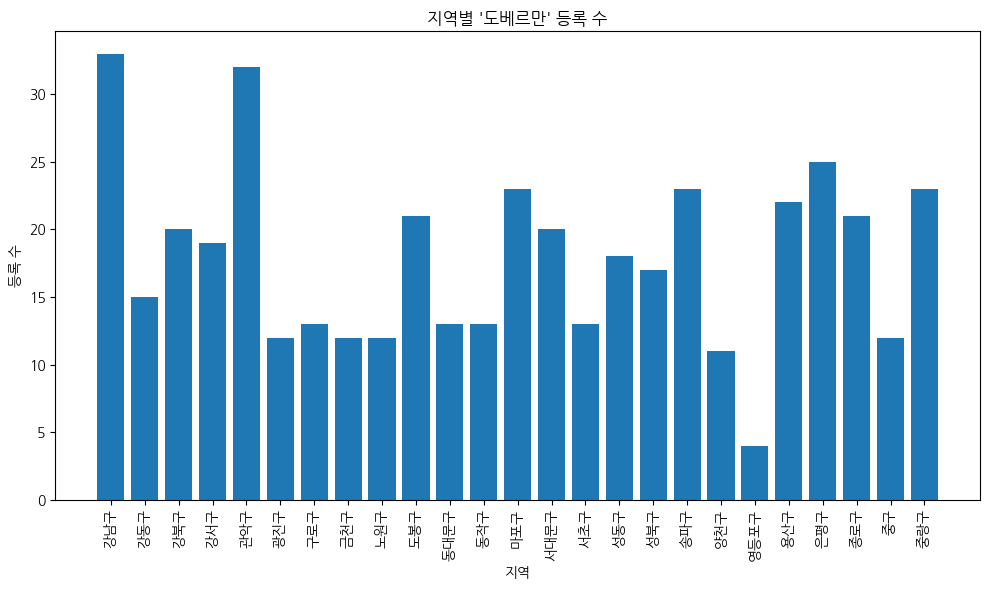

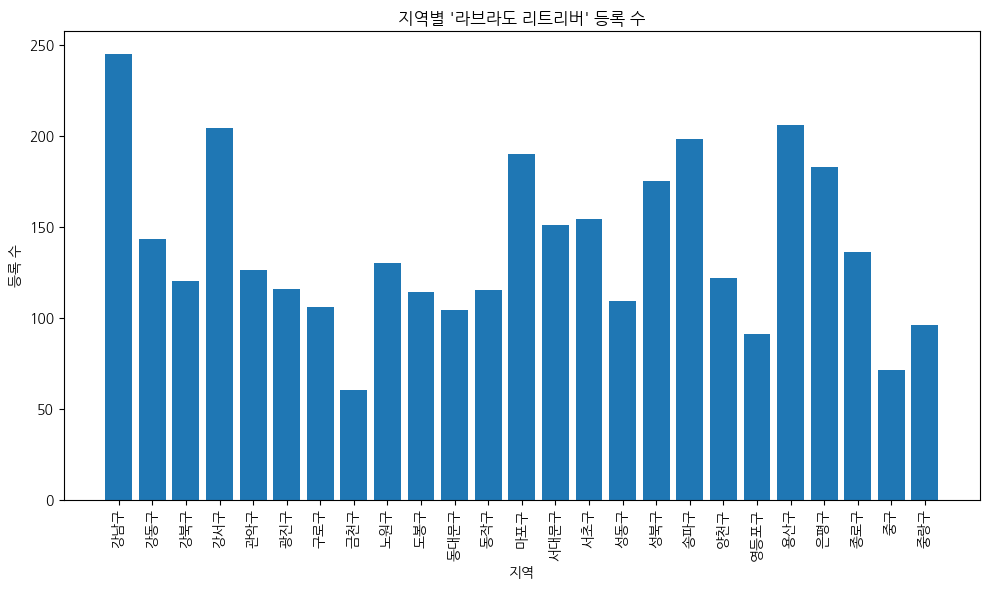

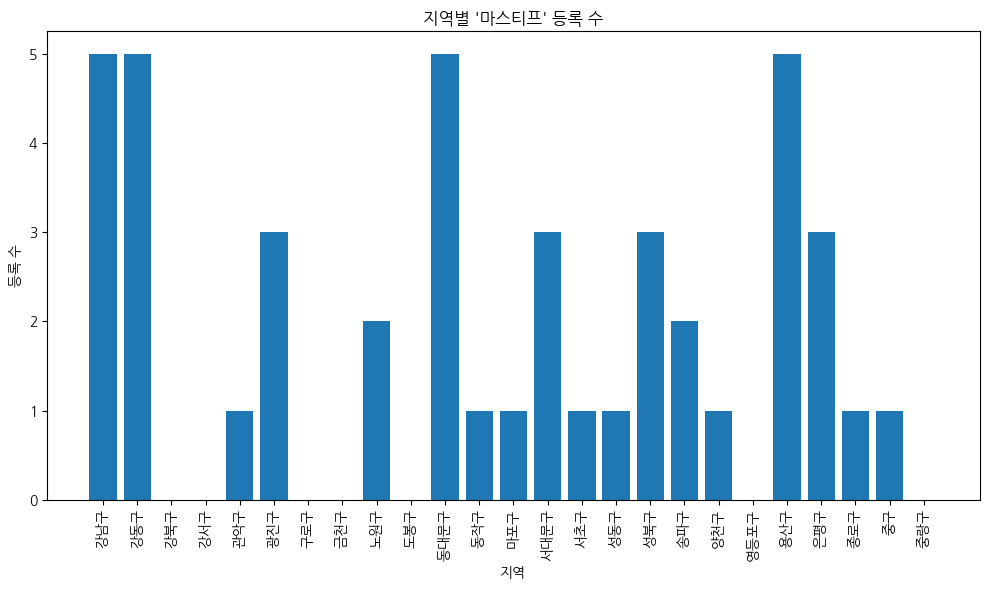

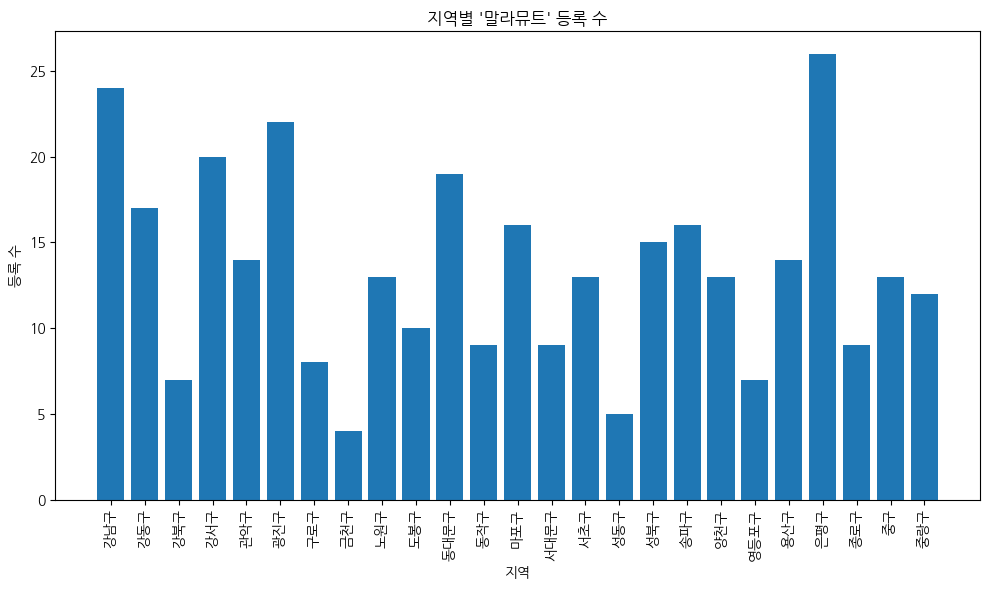

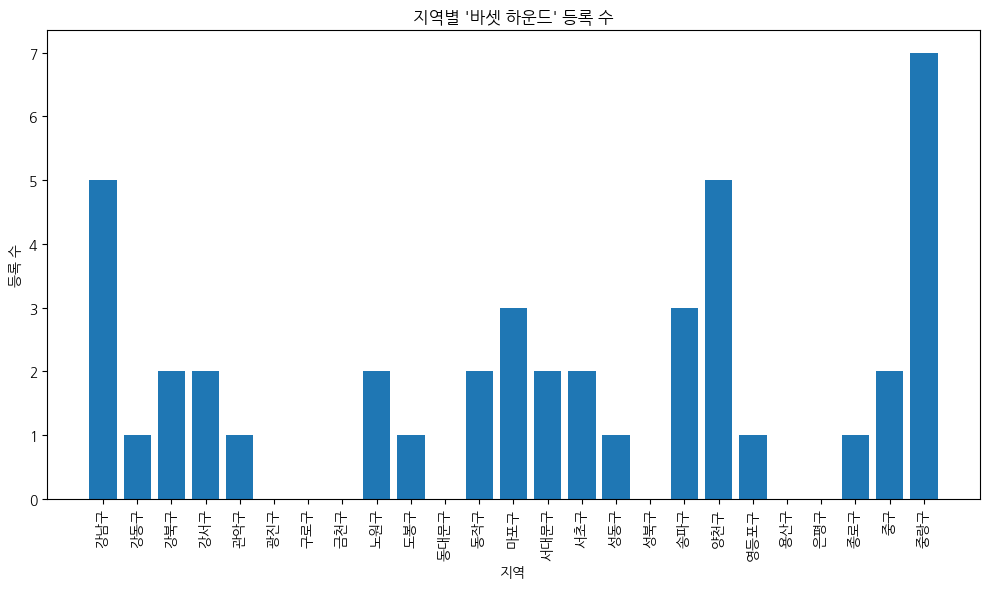

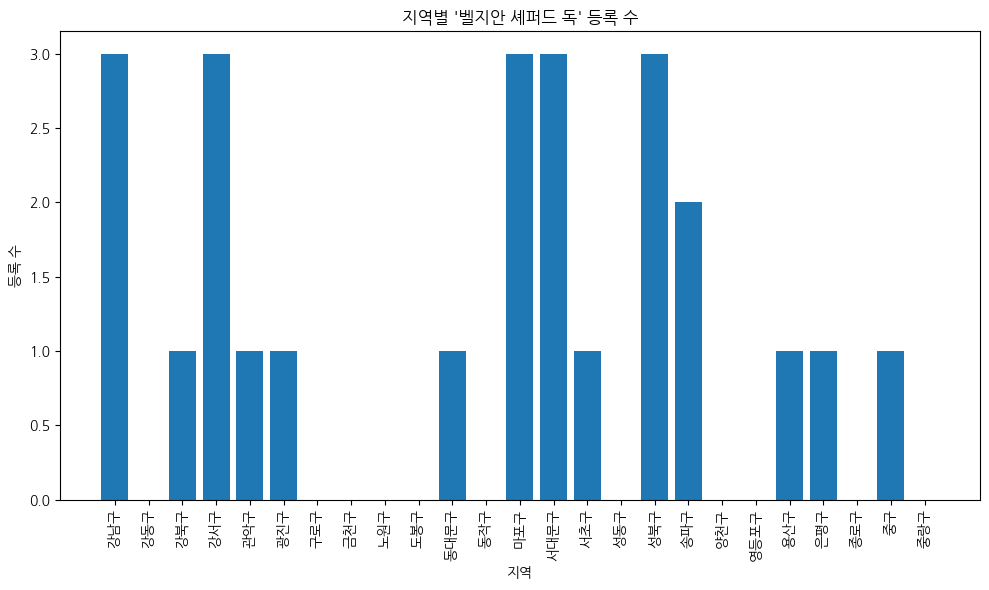

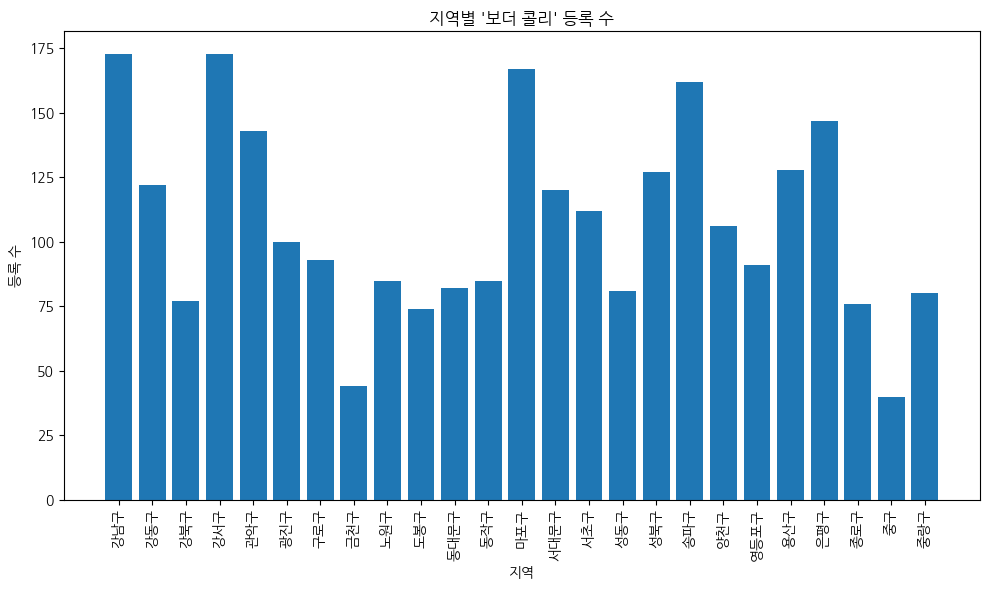

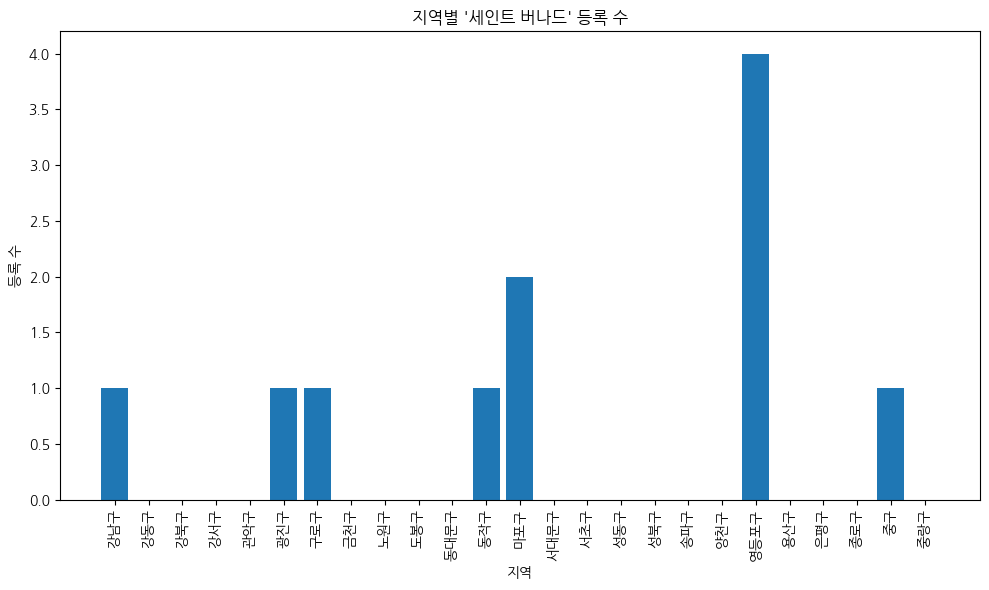

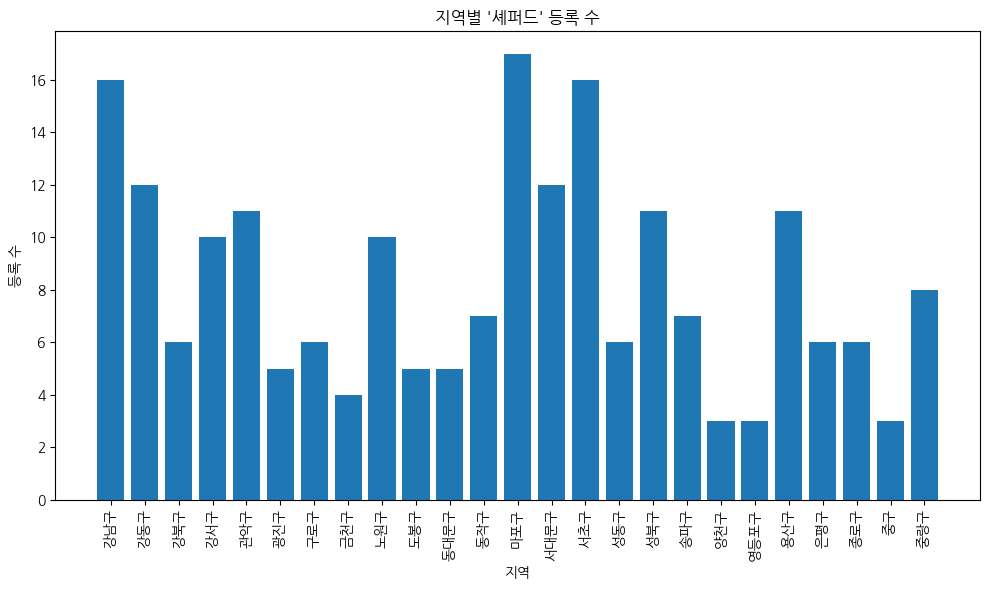

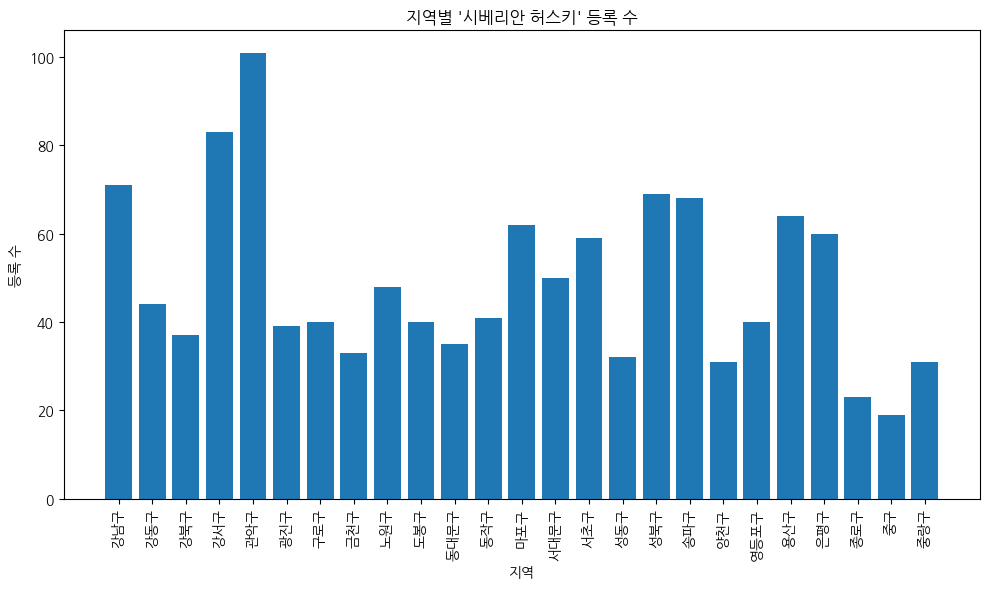

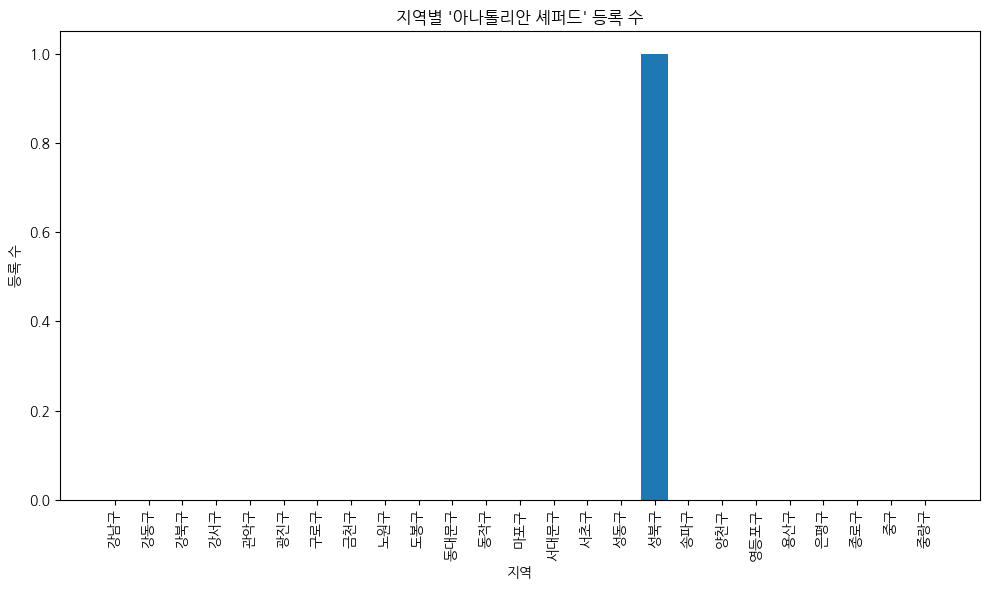

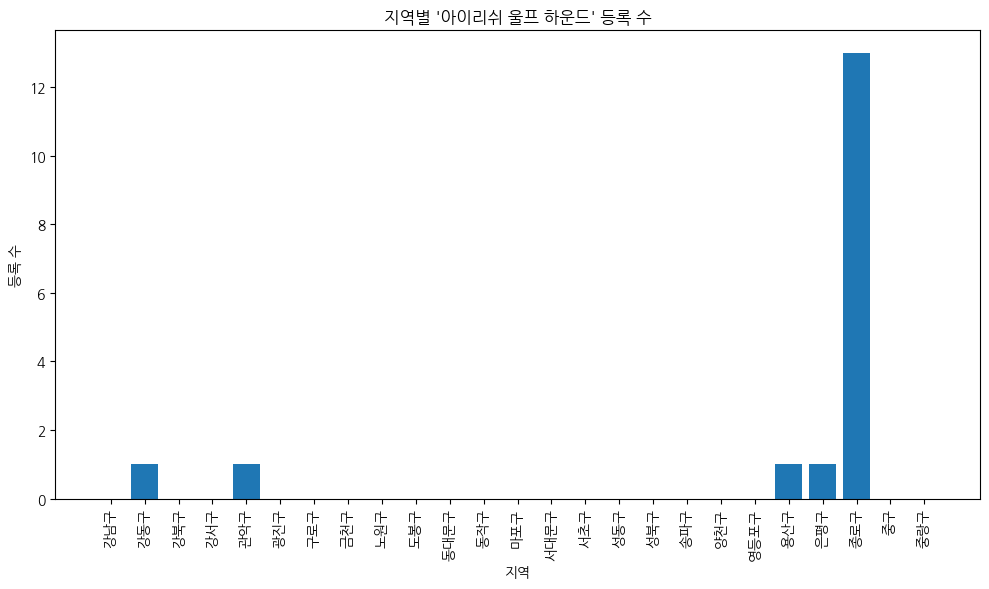

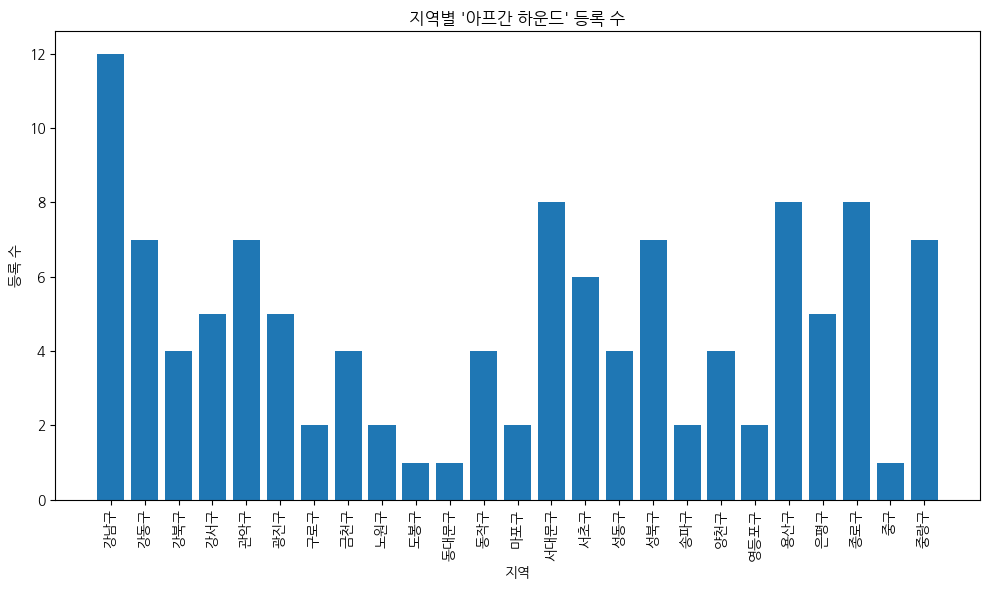

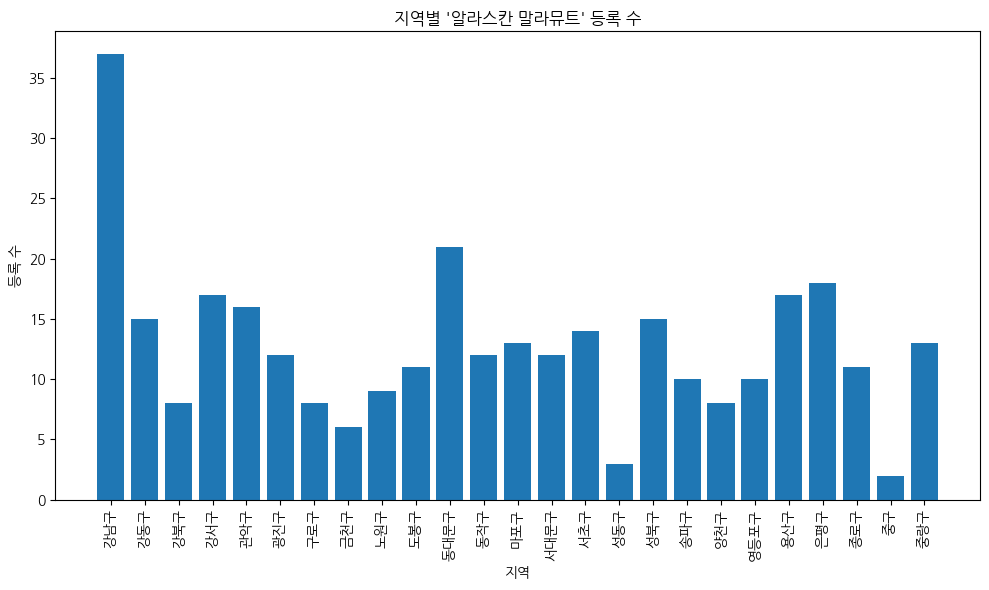

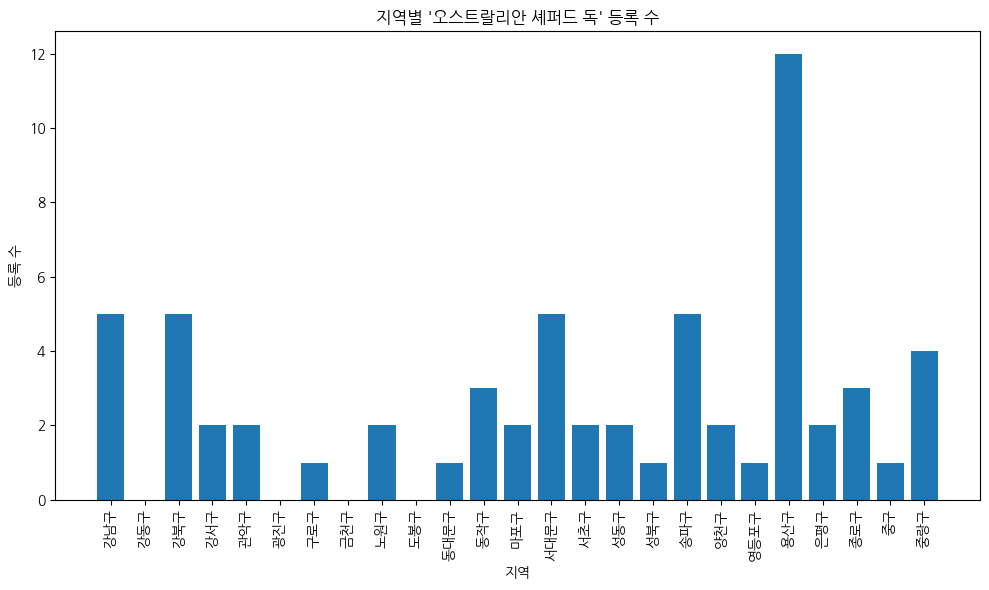

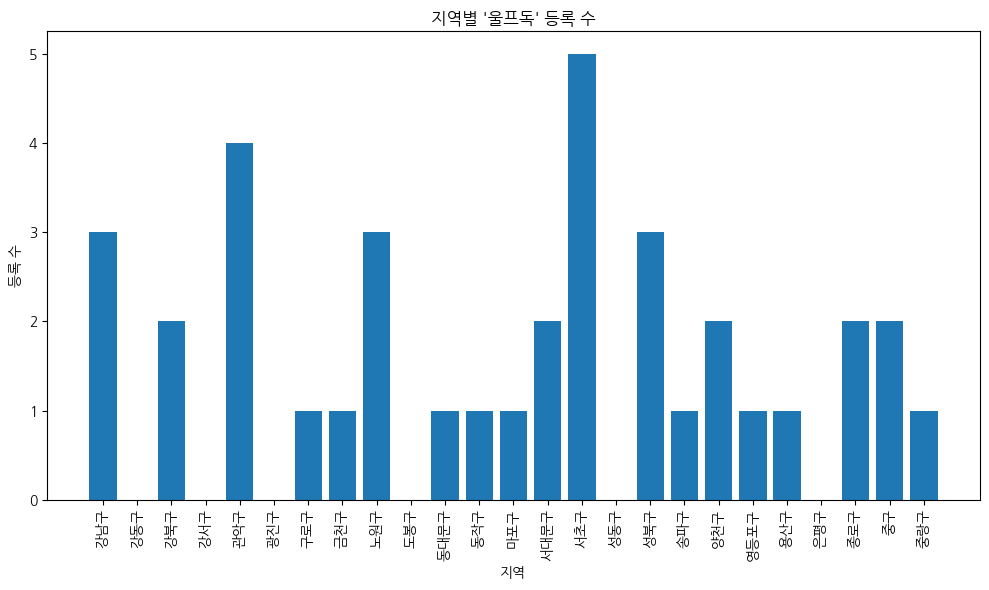

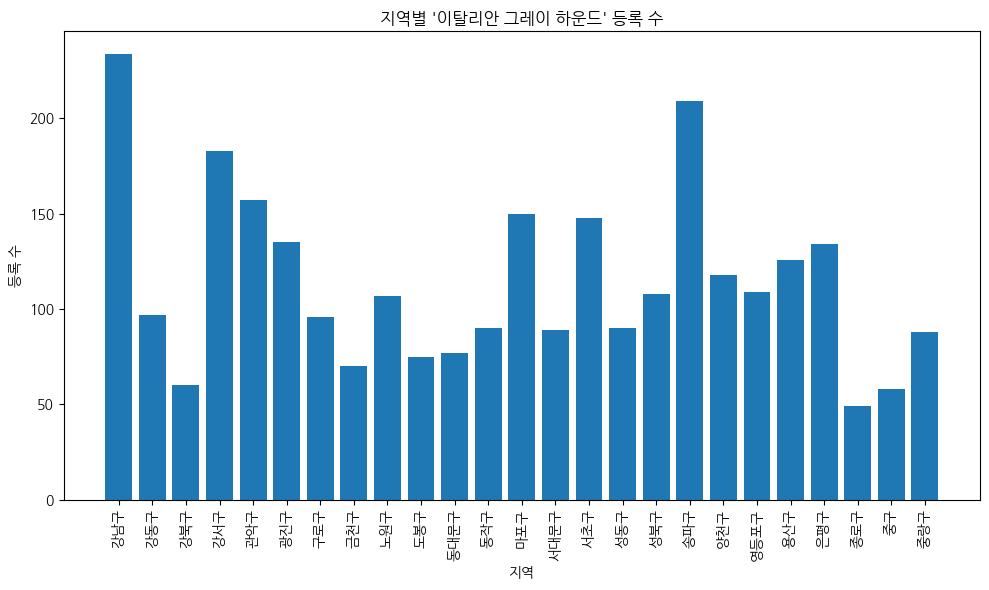

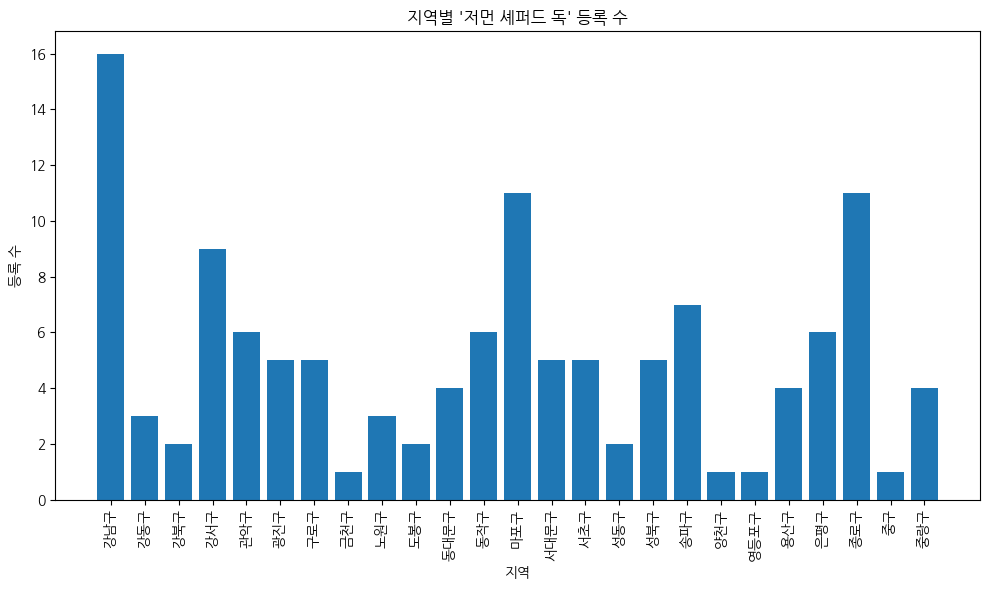

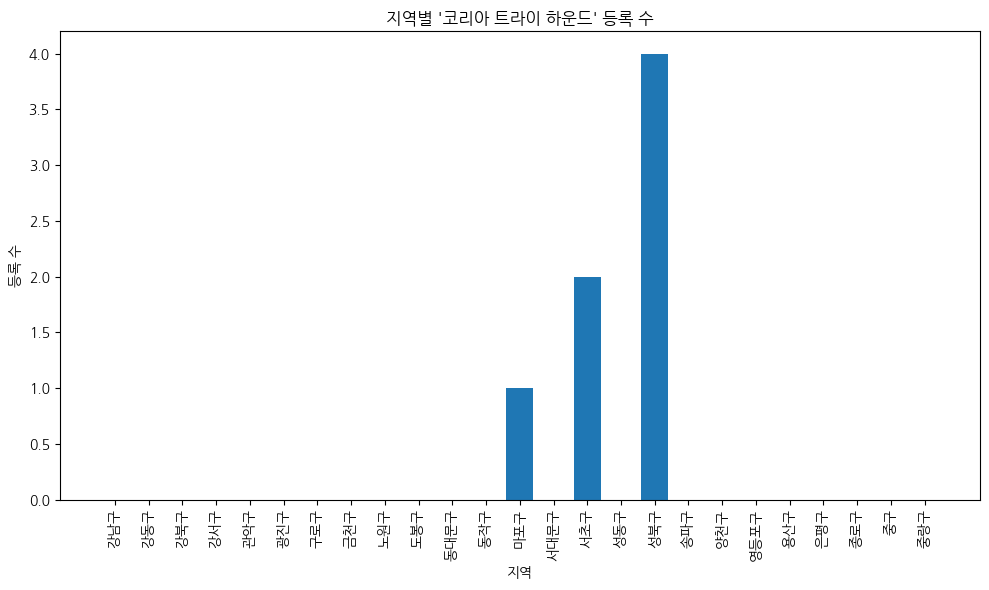

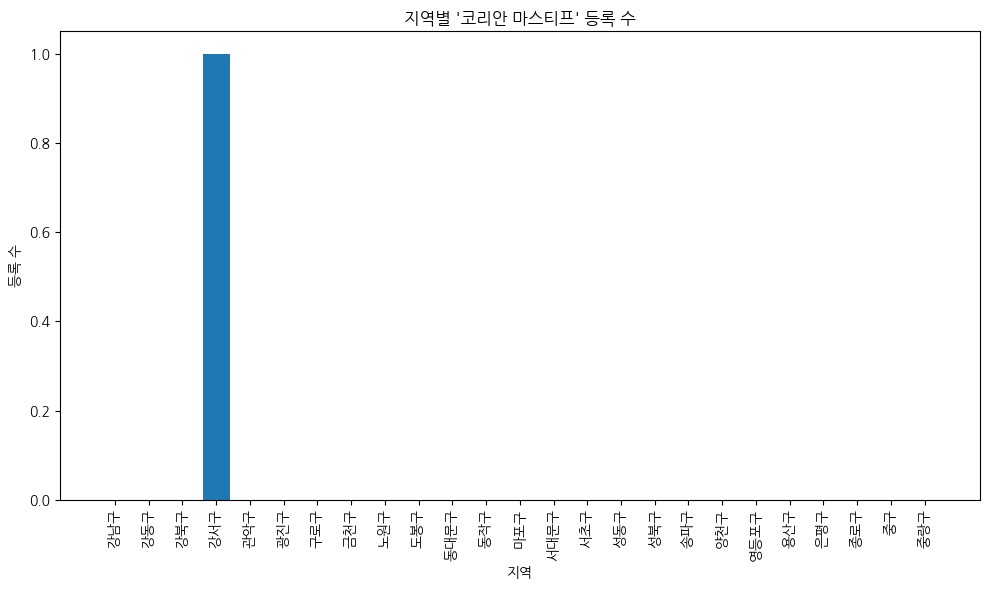

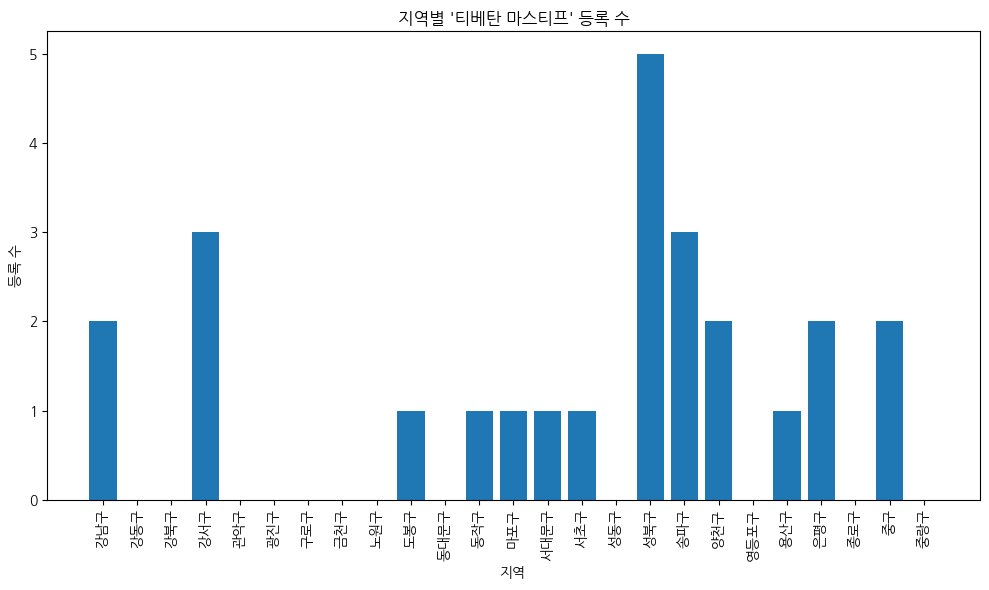

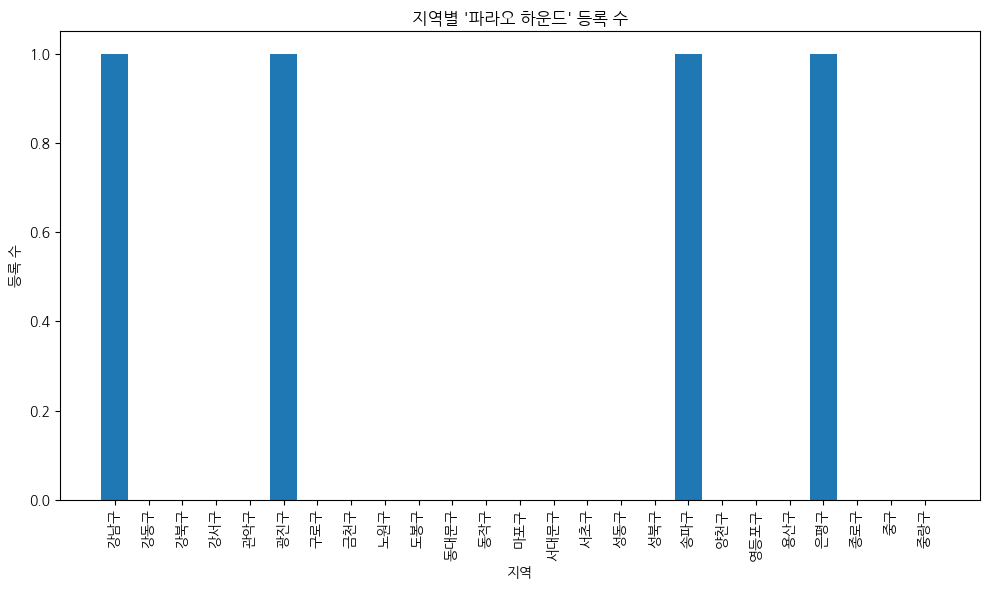

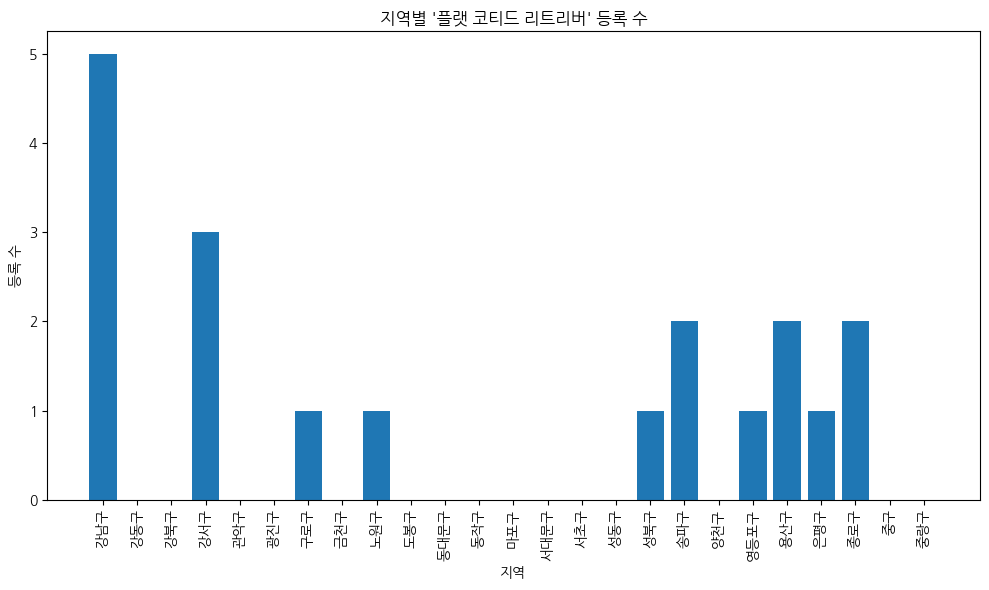

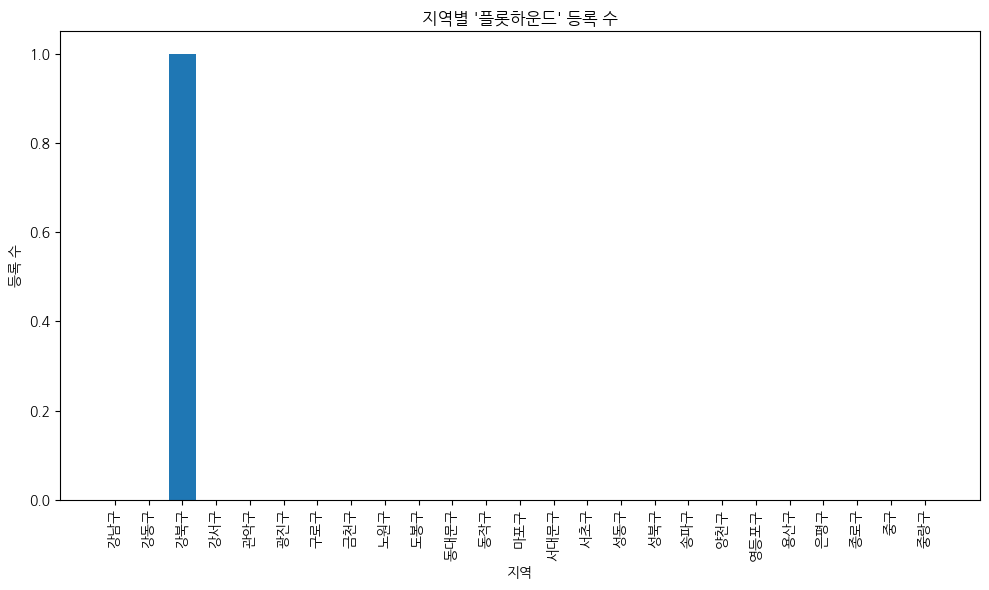

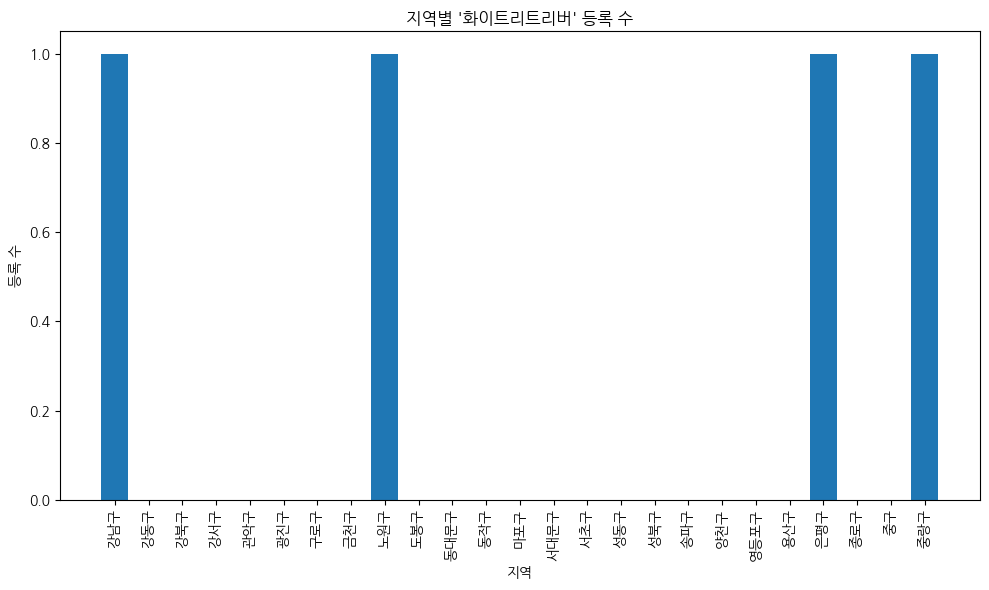

In [3]:
selected_keywords = [
    '리트리버', '그레이트', '마스티프', '셰퍼드', '허스키',
    '말라뮤트', '세인트 버나드', '울프독', '피레니즈',
    '도베르만', '하운드', '보더 콜리'
]

filtered_large_dogs = data[data['pet_type_id'].str.contains('|'.join(selected_keywords), case=False, na=False)]
distribution = filtered_large_dogs.groupby(['pet_type_id', 'region_id'])['count'].sum().unstack(fill_value=0)

for breed in distribution.index:
    breed_distribution = distribution.loc[breed]
    plt.figure(figsize=(10, 6))
    plt.bar(breed_distribution.index, breed_distribution.values)
    plt.title(f"지역별 '{breed}' 등록 수")
    plt.xlabel("지역")
    plt.ylabel("등록 수")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


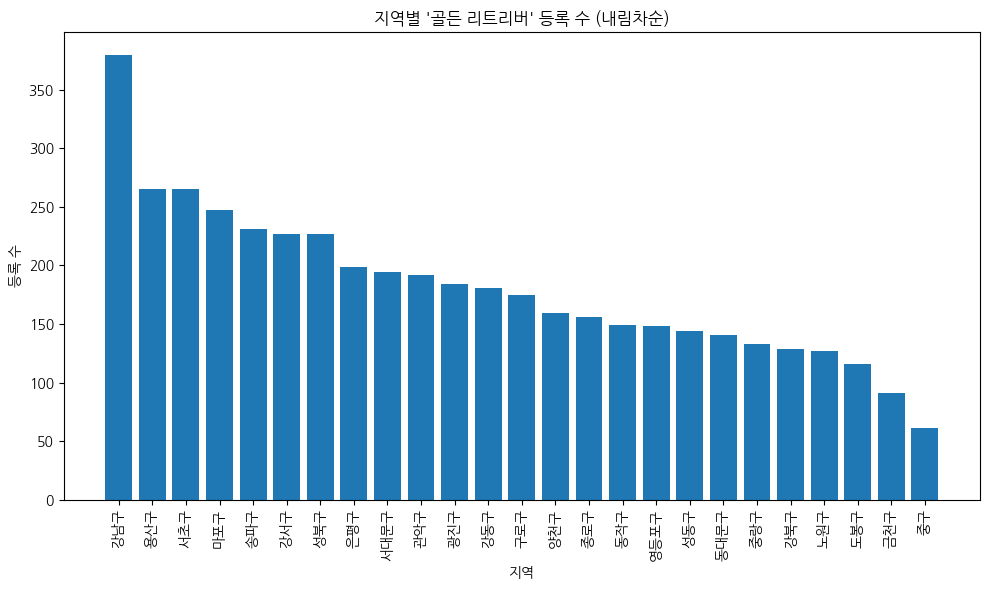

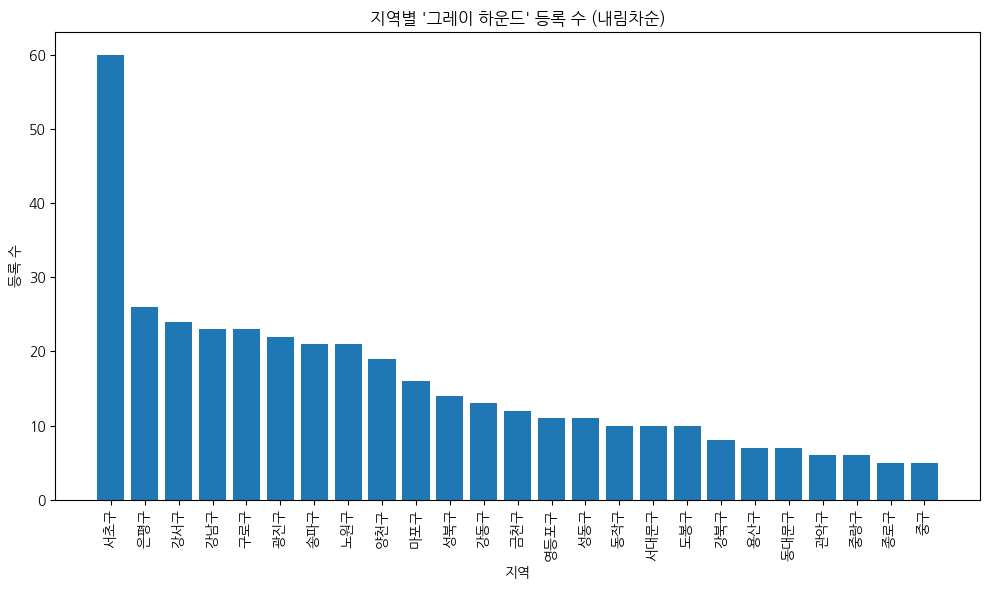

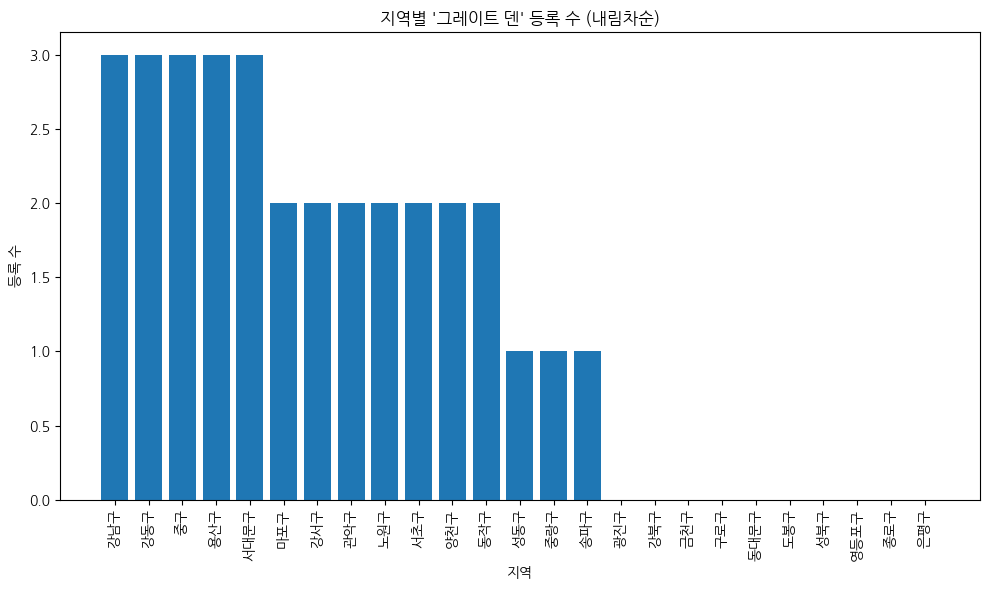

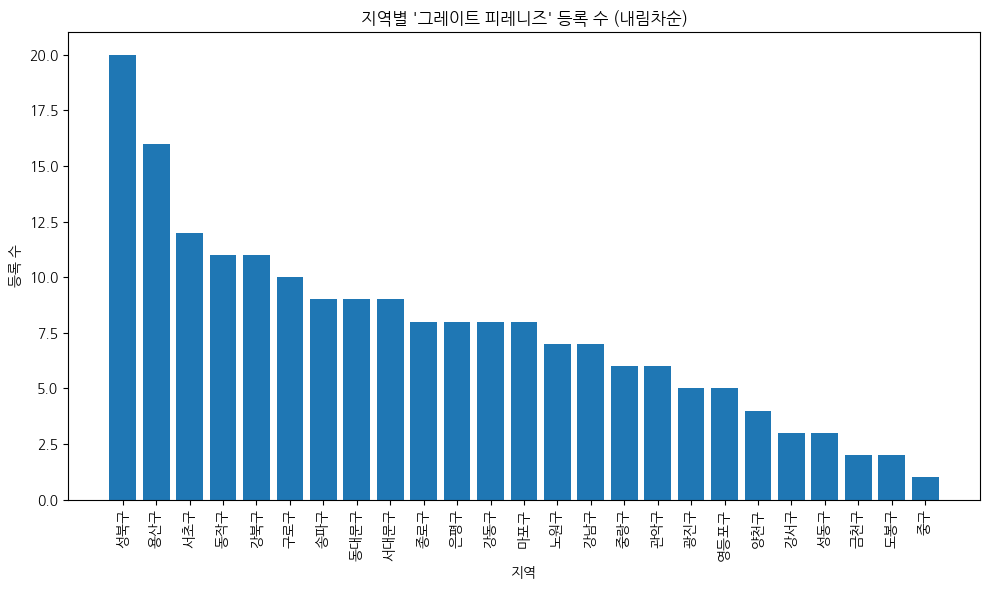

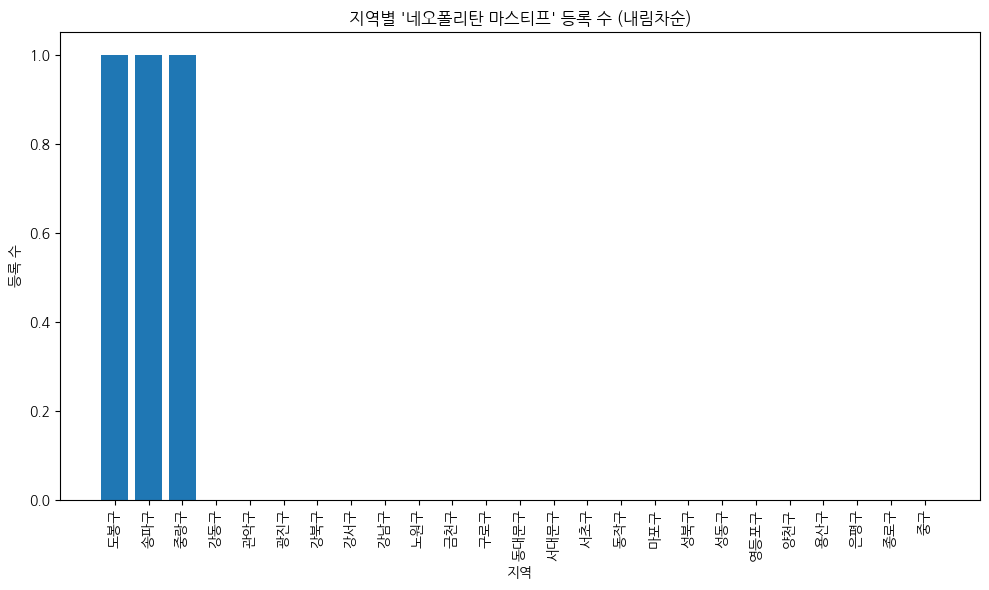

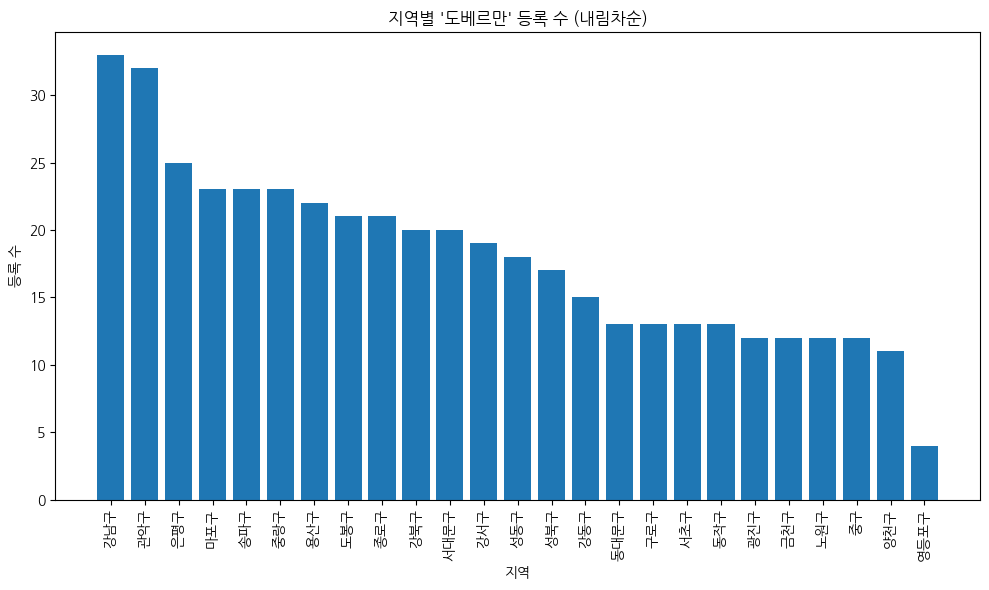

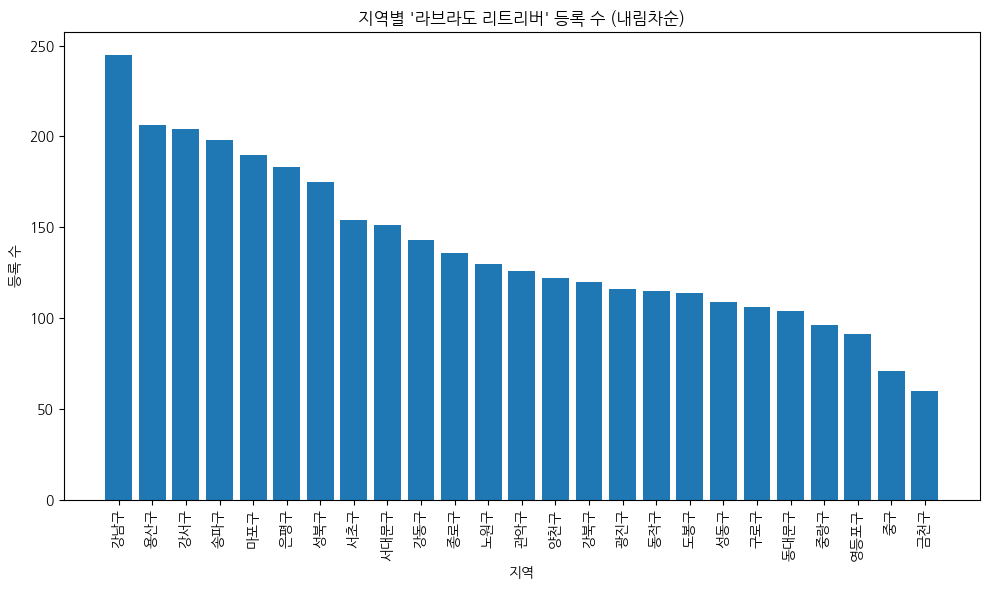

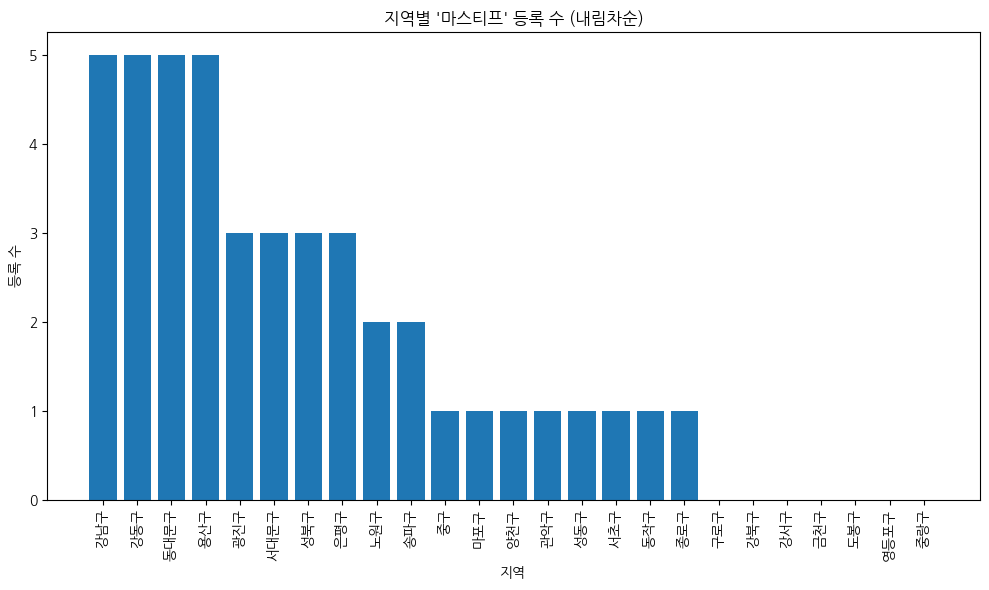

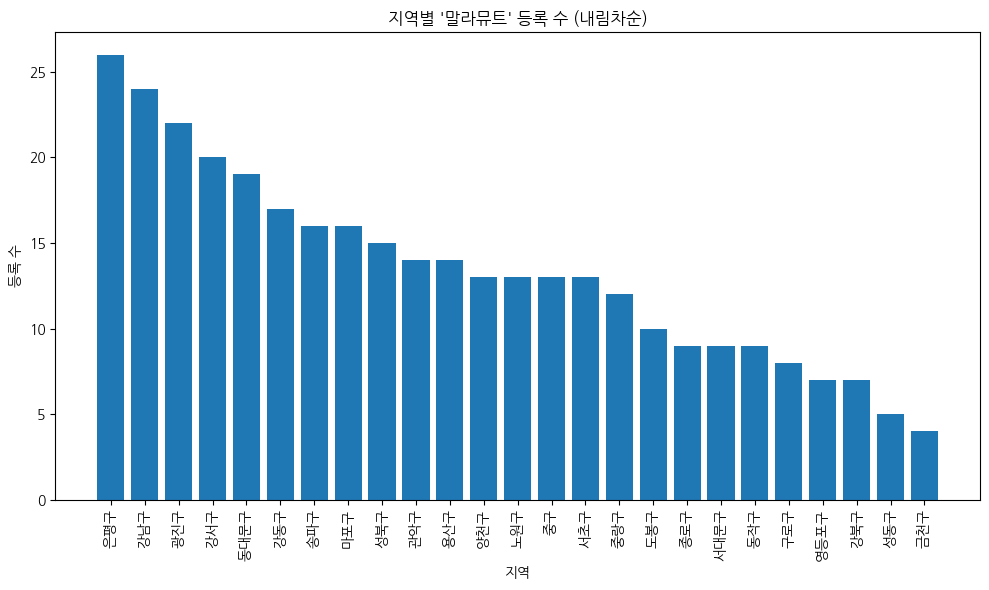

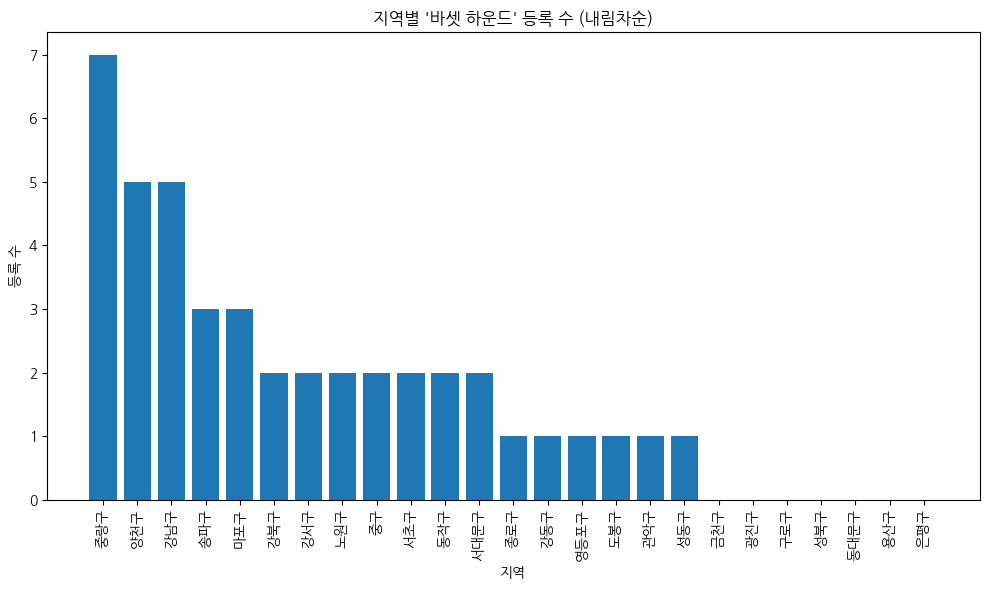

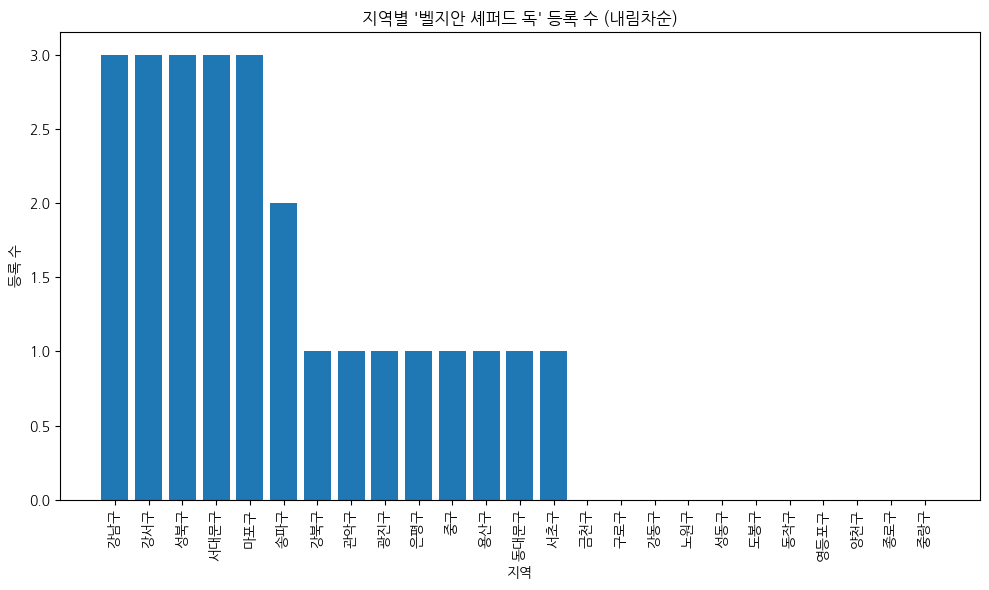

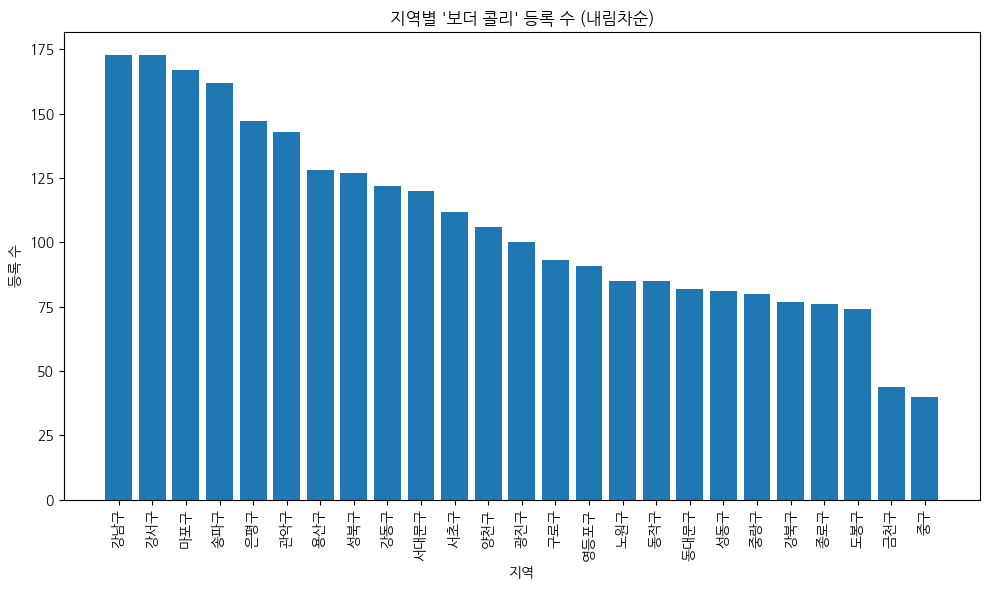

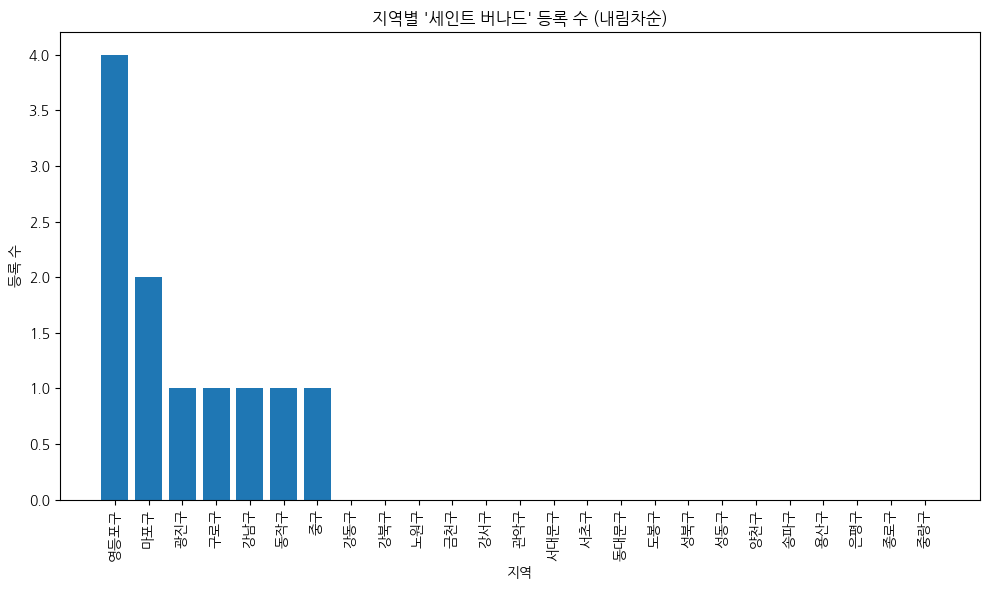

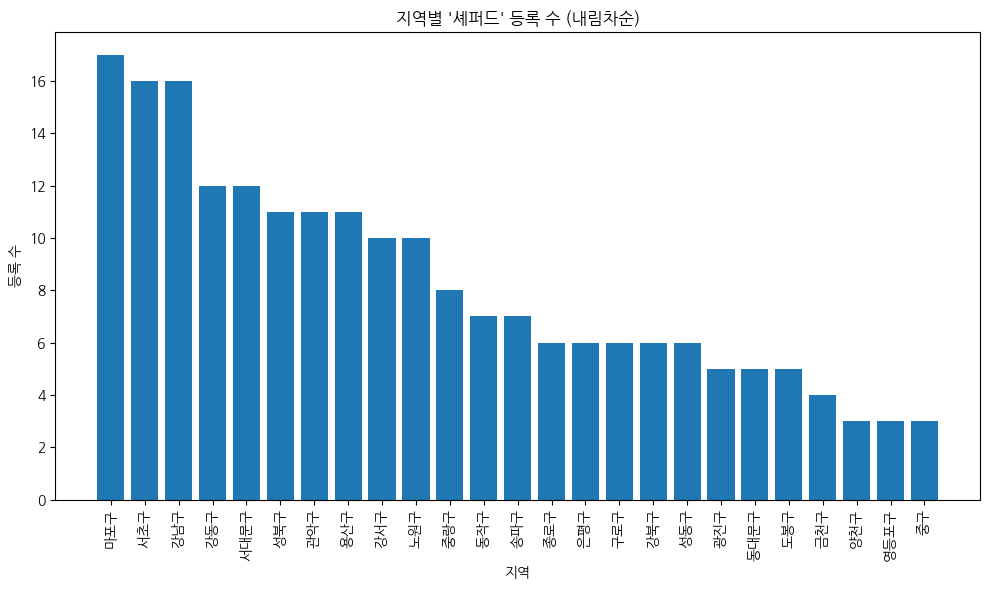

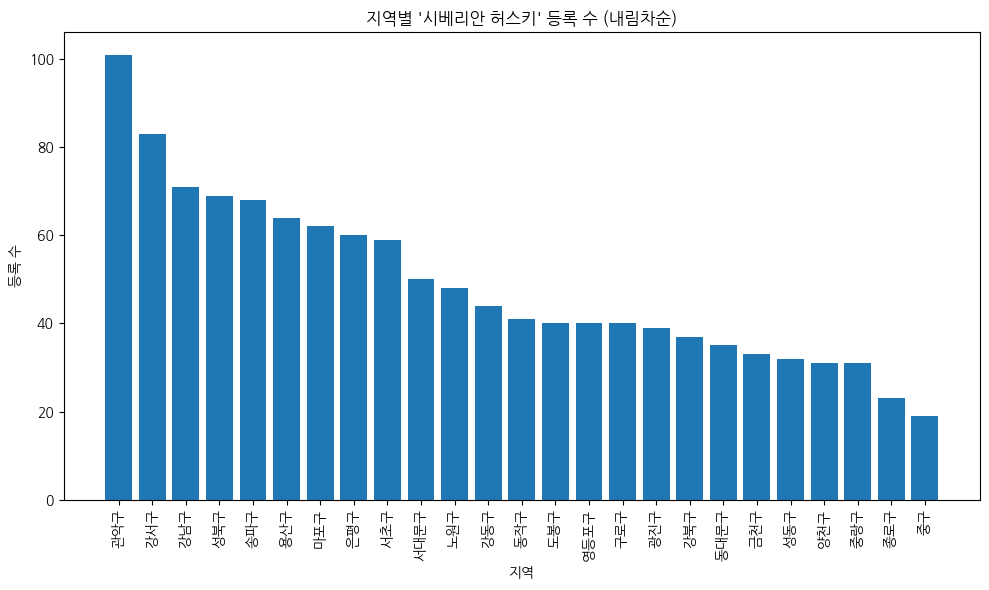

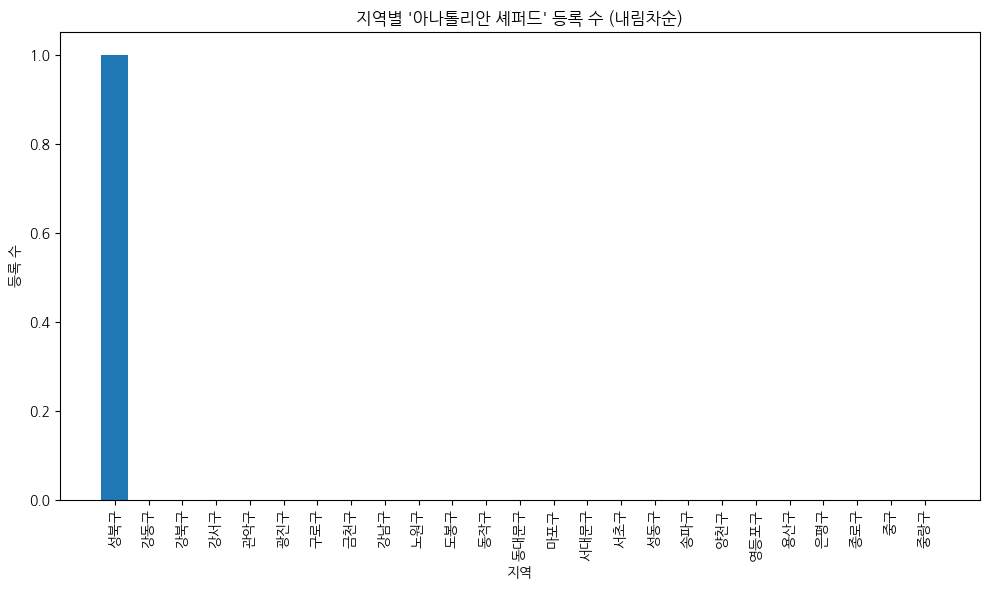

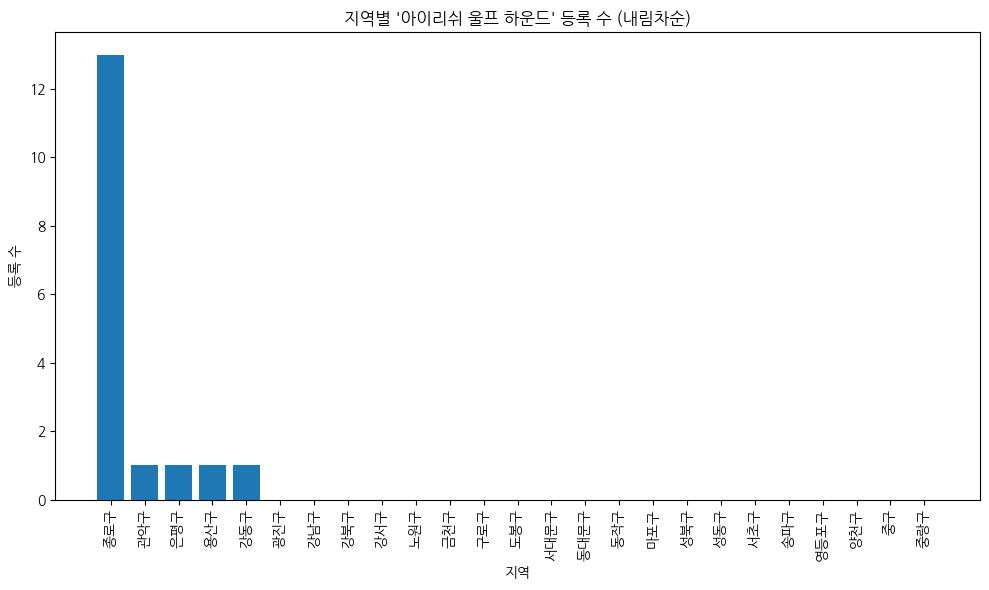

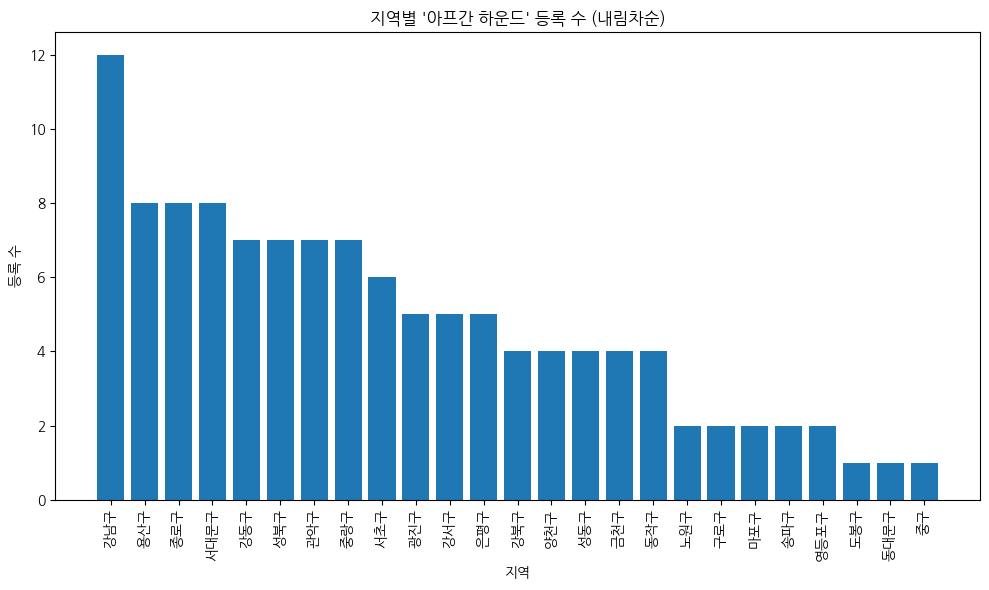

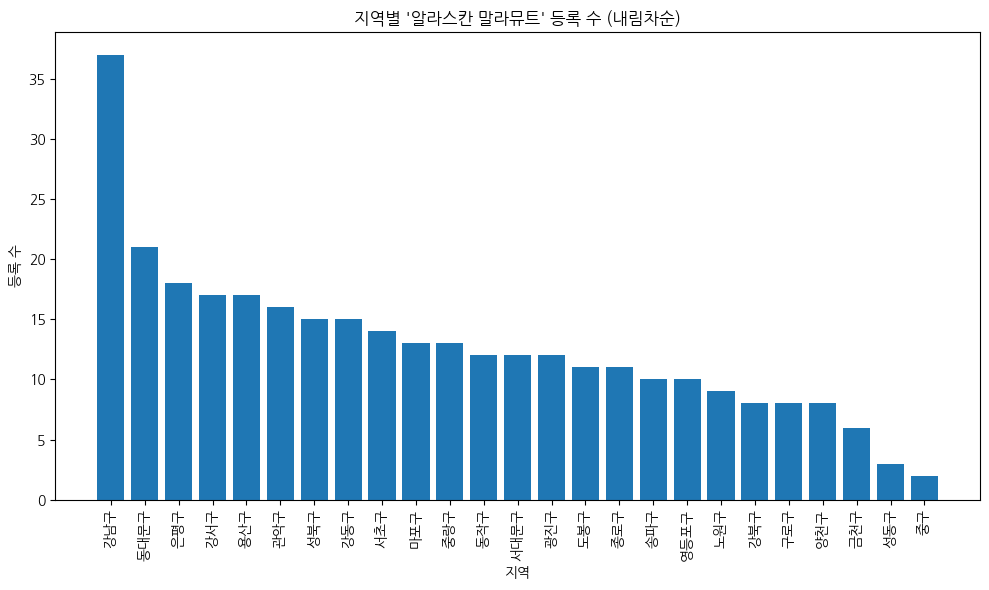

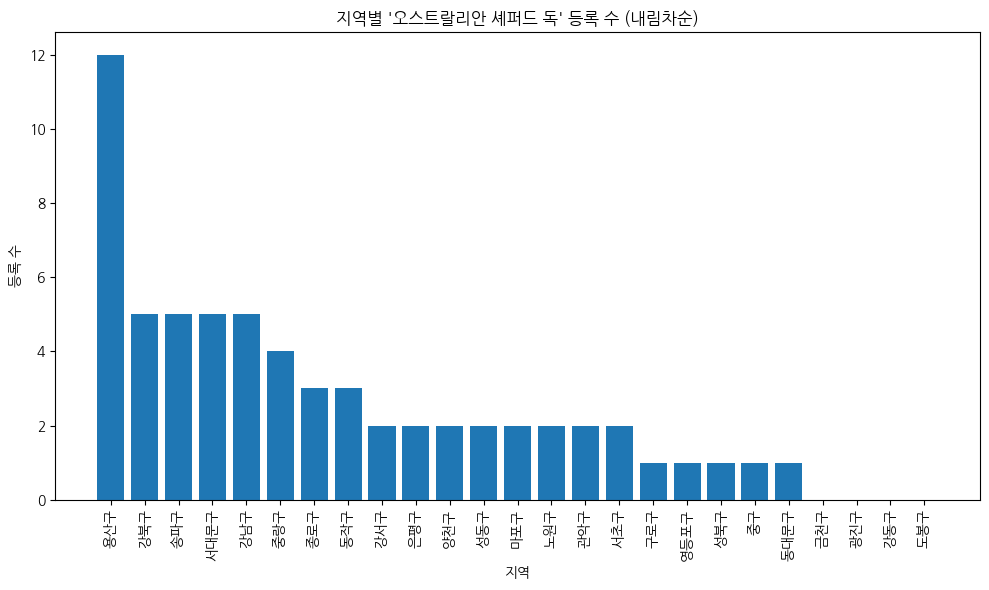

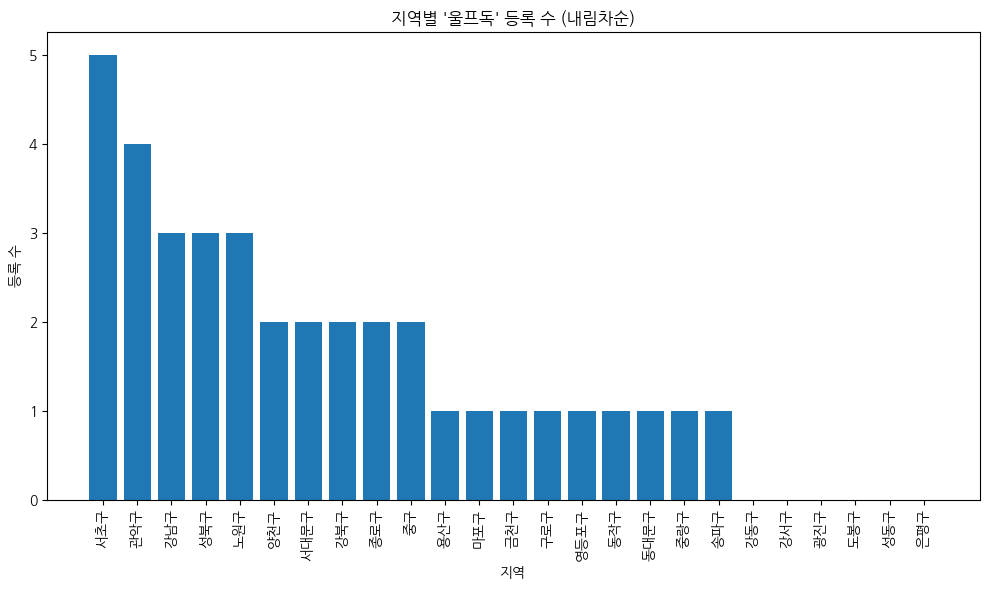

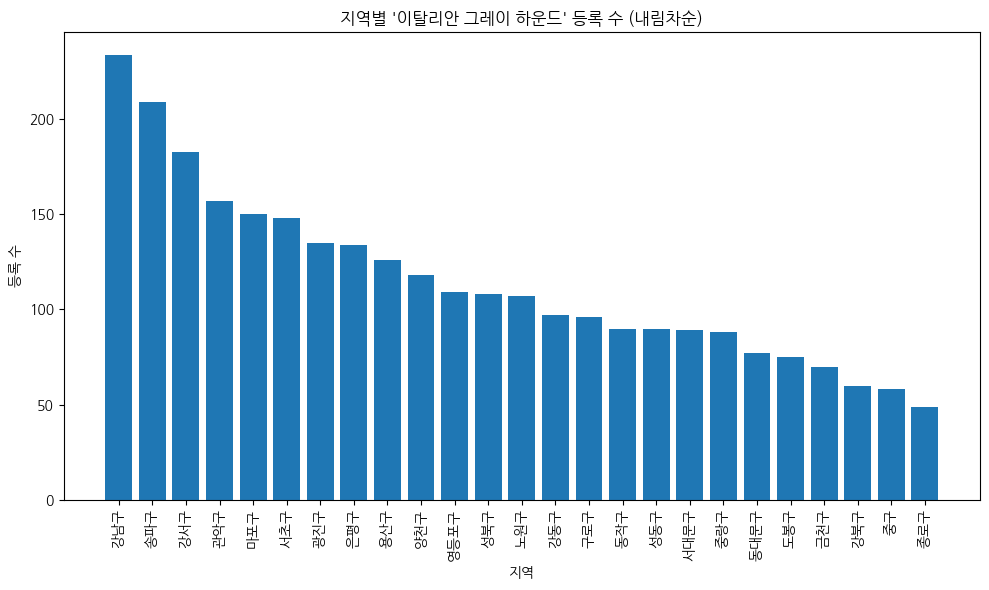

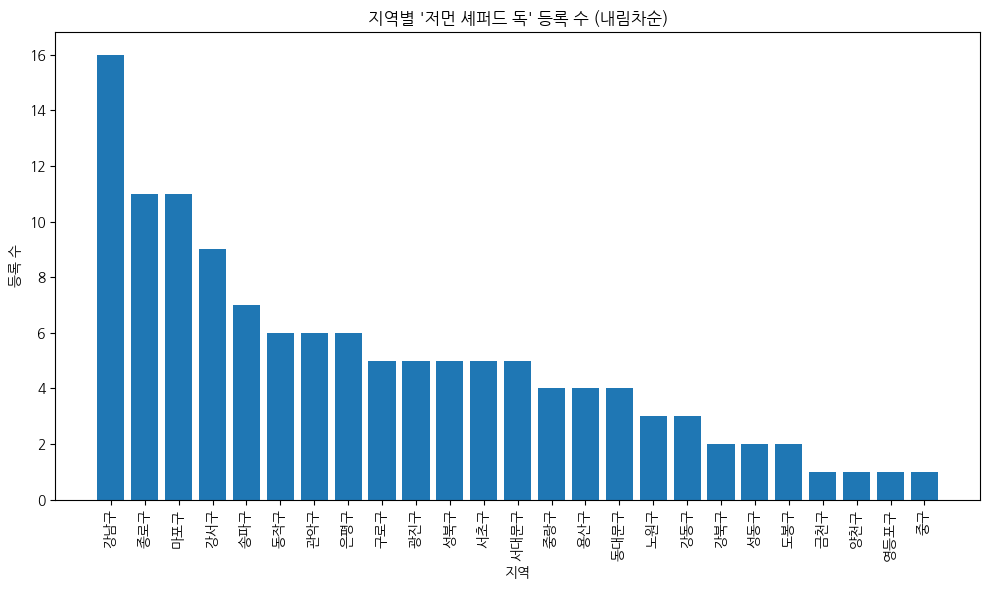

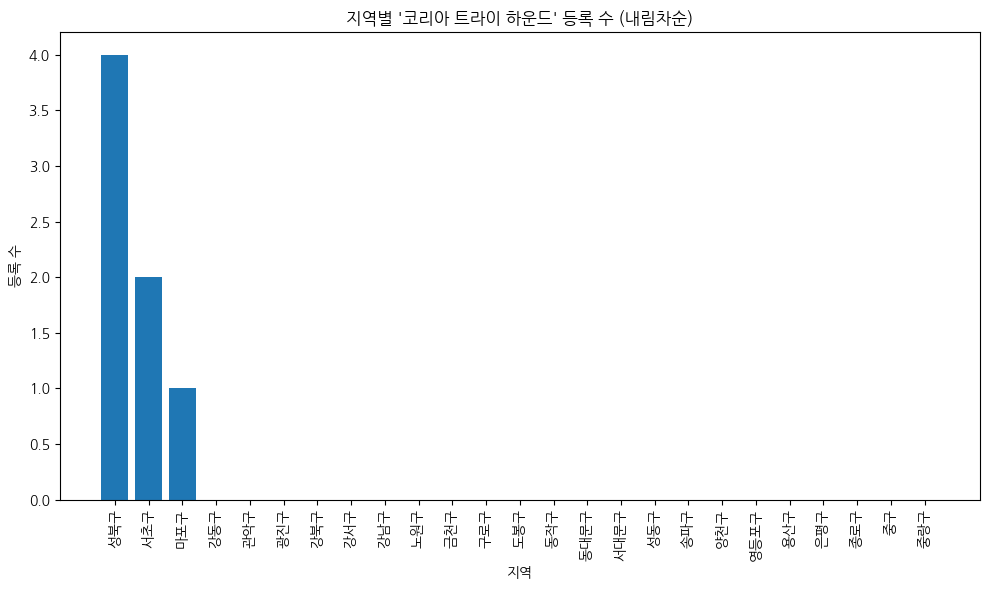

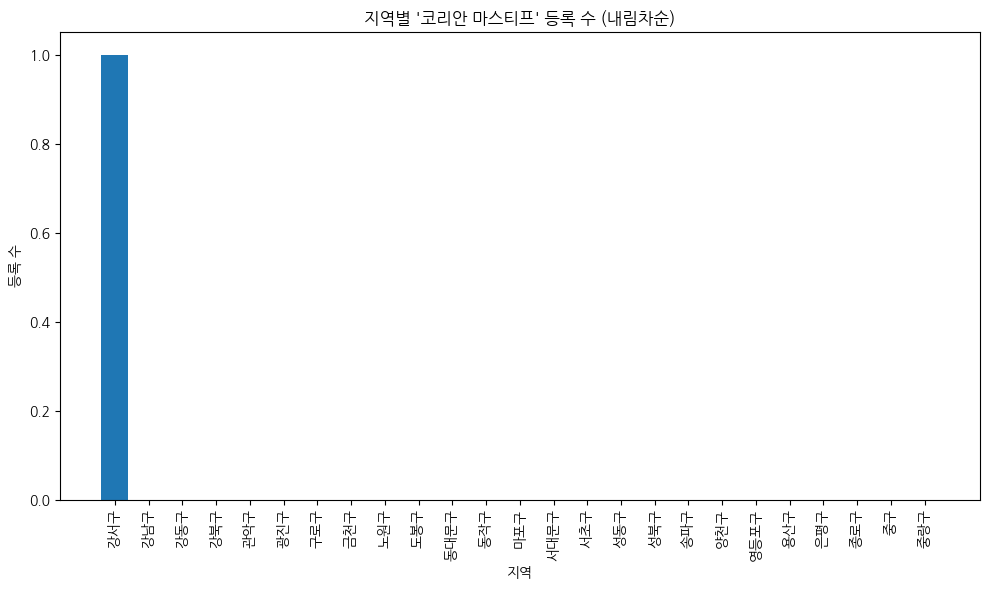

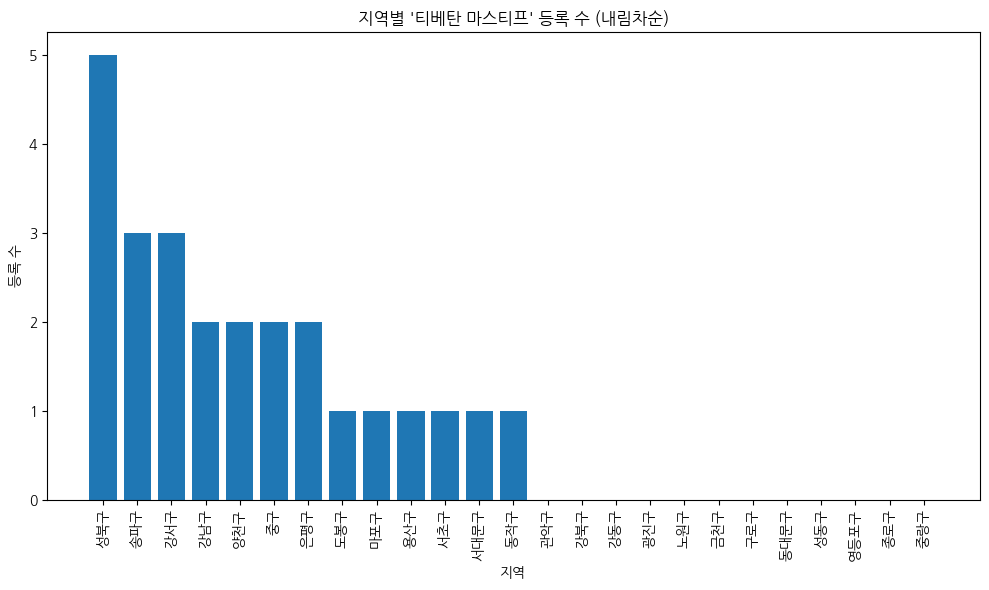

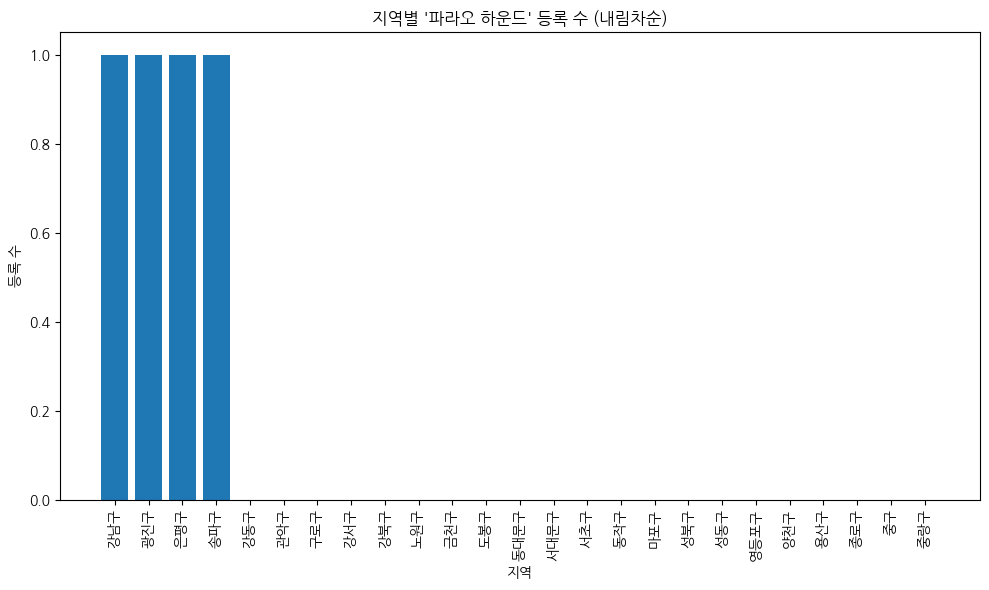

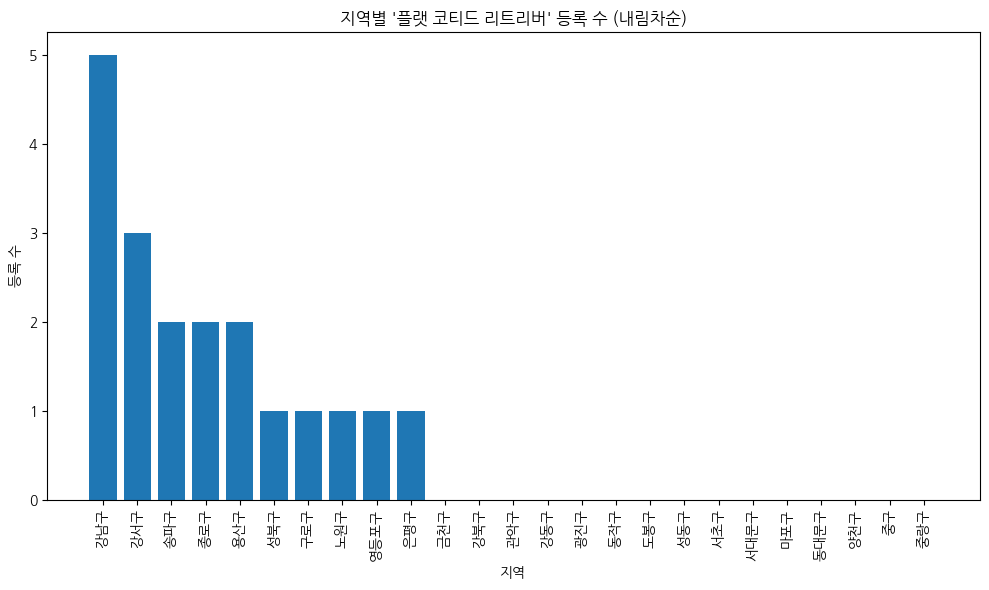

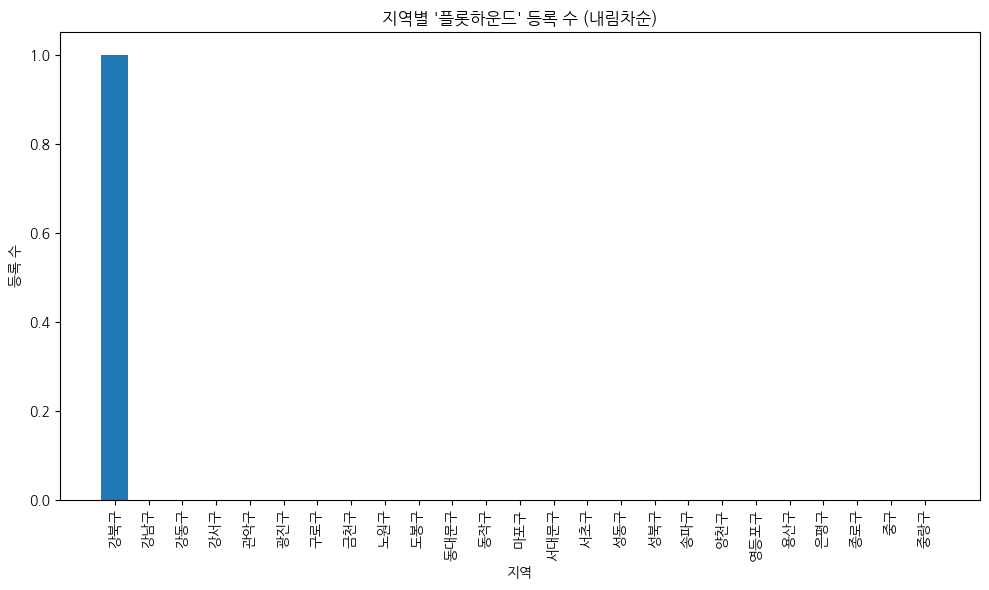

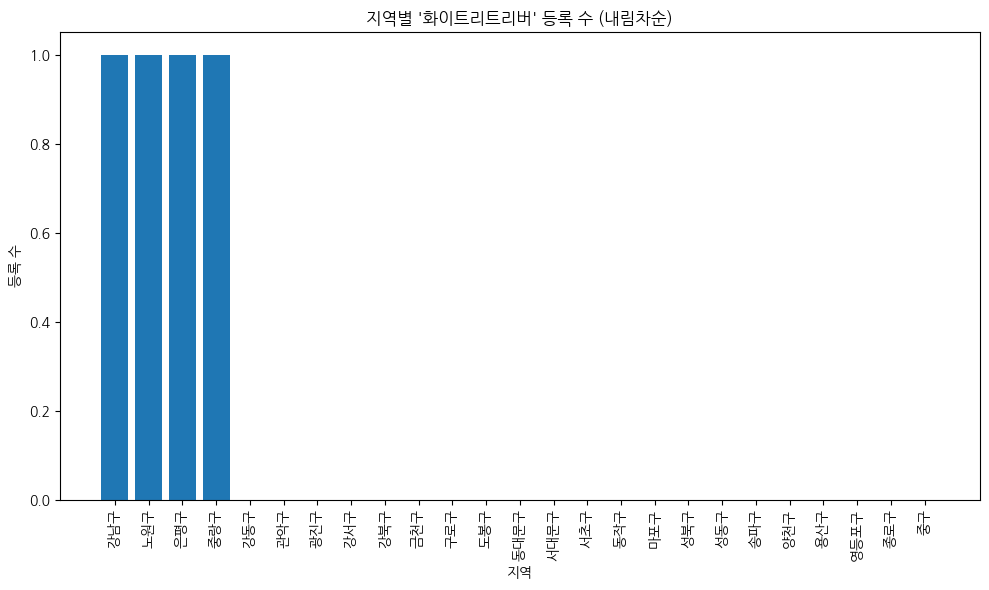

In [4]:
# Re-draw the graphs for each breed in descending order
for breed in distribution.index:
    breed_distribution = distribution.loc[breed].sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(breed_distribution.index, breed_distribution.values)
    plt.title(f"지역별 '{breed}' 등록 수 (내림차순)")
    plt.xlabel("지역")
    plt.ylabel("등록 수")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


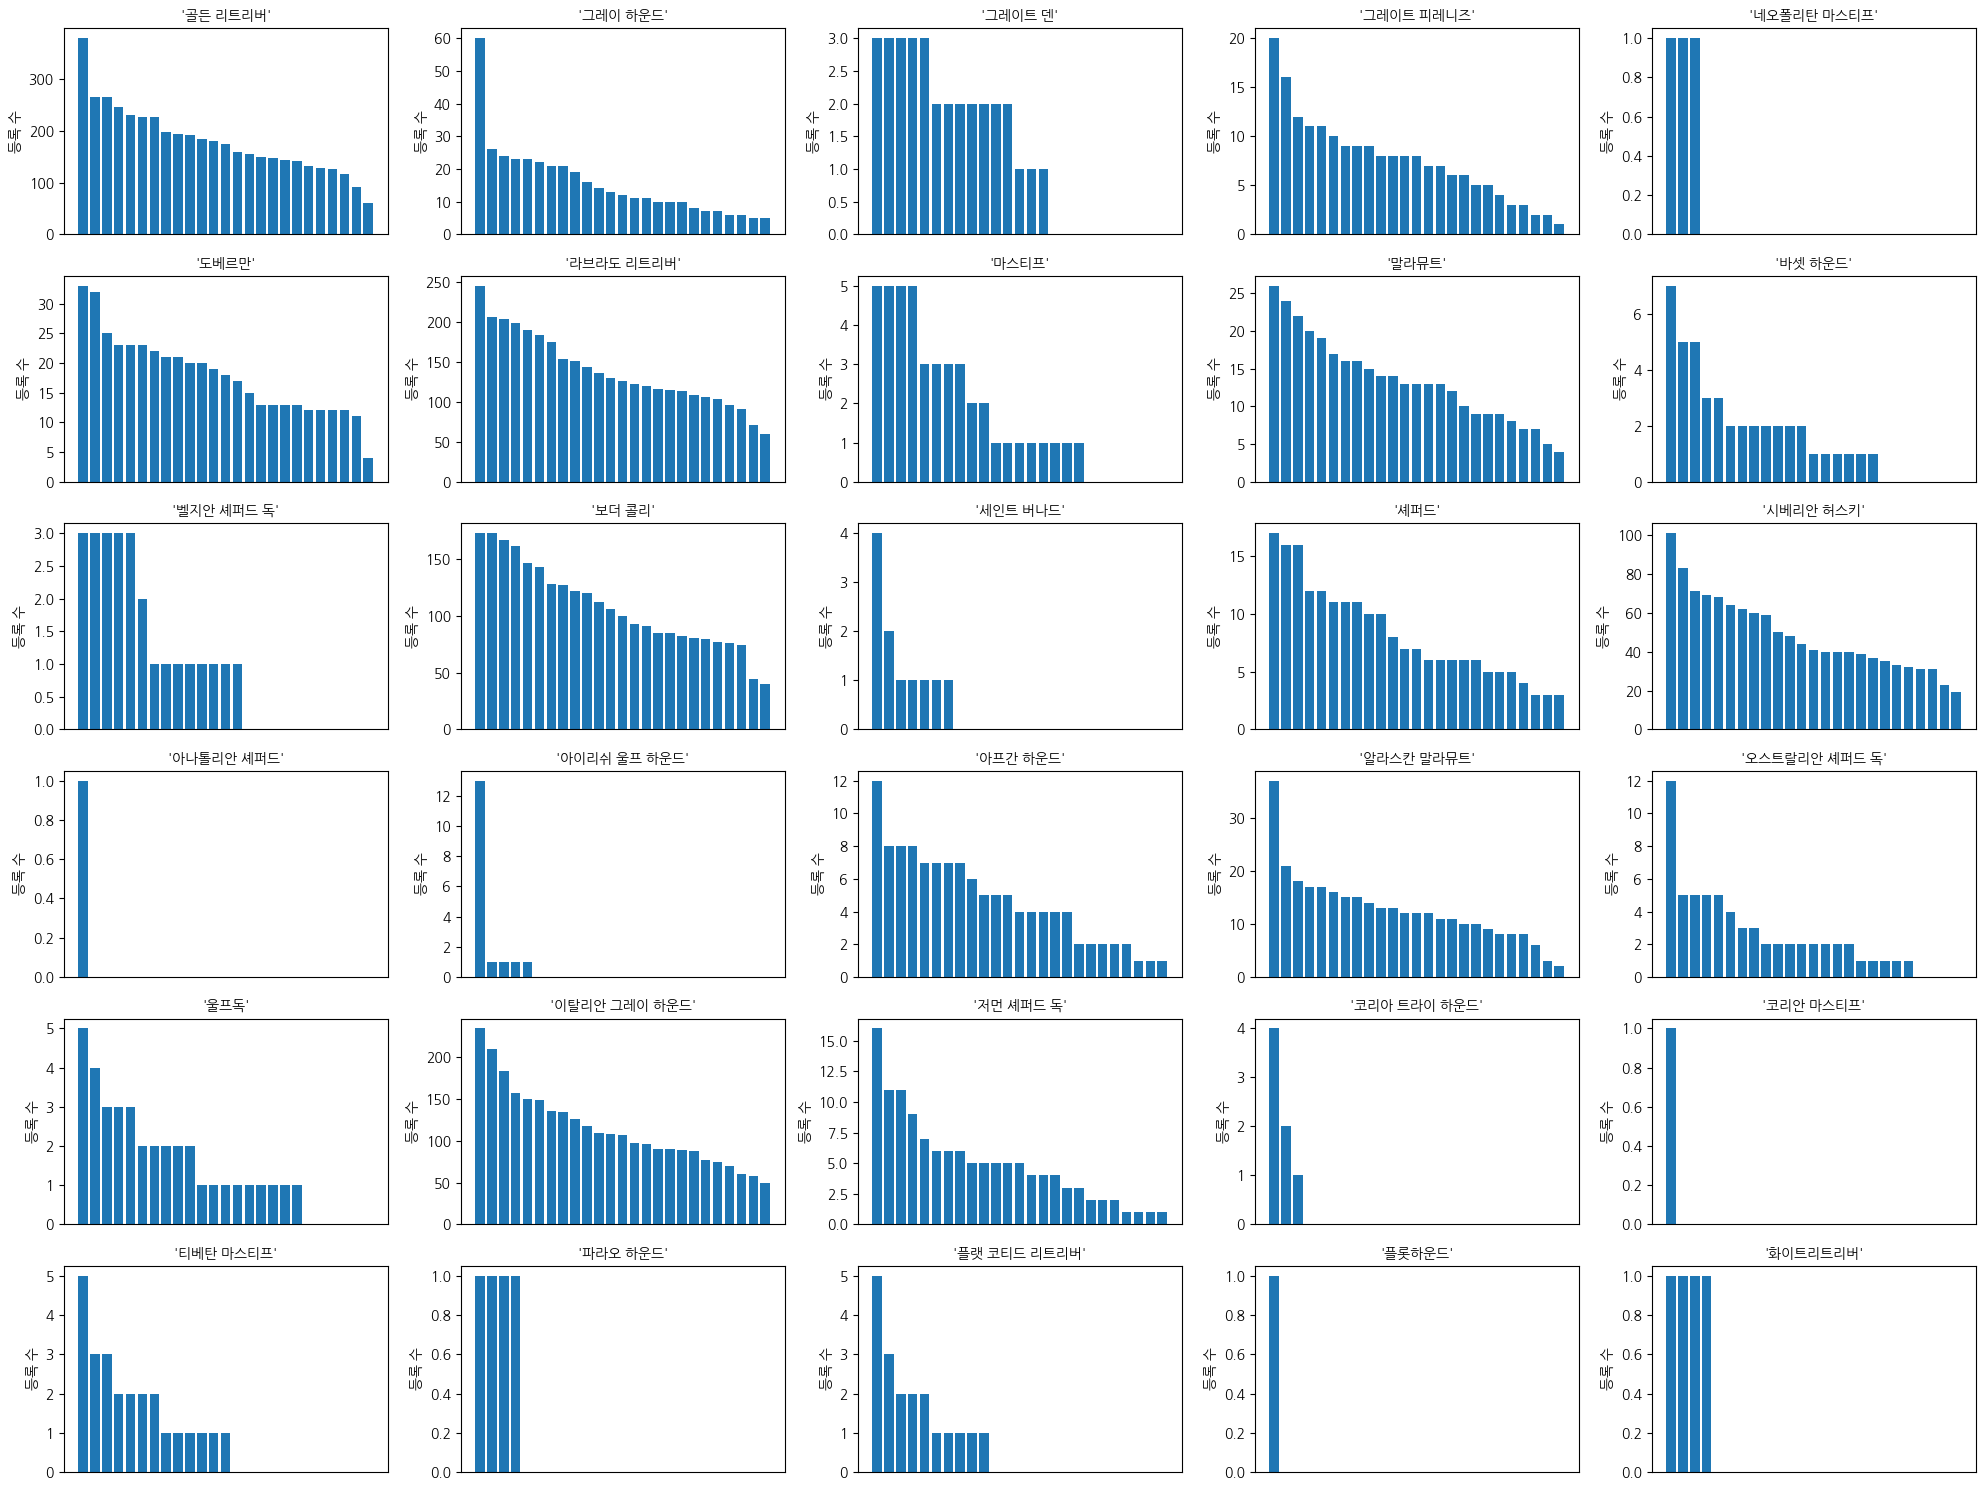

In [5]:
cols = 5  # Number of columns
rows = 6  # Number of rows

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

for i, breed in enumerate(distribution.index):
    breed_distribution = distribution.loc[breed].sort_values(ascending=False)
    axes[i].bar(breed_distribution.index, breed_distribution.values)
    axes[i].set_title(f"'{breed}'", fontsize=10)
    axes[i].set_xticks([])  # Hide x-axis ticks to save space
    axes[i].set_ylabel("등록 수")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [6]:
from collections import Counter

districts = [
    "강남구", "종로구", "마포구",
    "강남구", "송파구", "강서구",
    "강남구", "동대문구", "은평구",
    "강남구", "용산구", "종로구",
    "관악구", "강서구", "강남구",
    "마포구", "서초구", "강남구",
    "강남구", "강서구", "마포구",
    "은평구", "강남구", "광진구",
    "강남구", "용산구", "강서구",
    "강남구", "관악구", "은평구",
    "성북구", "용산구", "서초구",
    "서초구", "은평구", "강서구",
    "강남구", "용산구", "서초구"
]


district_counts = Counter(districts)
total_count = sum(district_counts.values())
district_percentages = {district: (count / total_count) * 100 for district, count in district_counts.items()}
district_percentages = dict(sorted(district_percentages.items()))
df = pd.DataFrame(list(district_percentages.items()), columns=["District", "Percentage"])

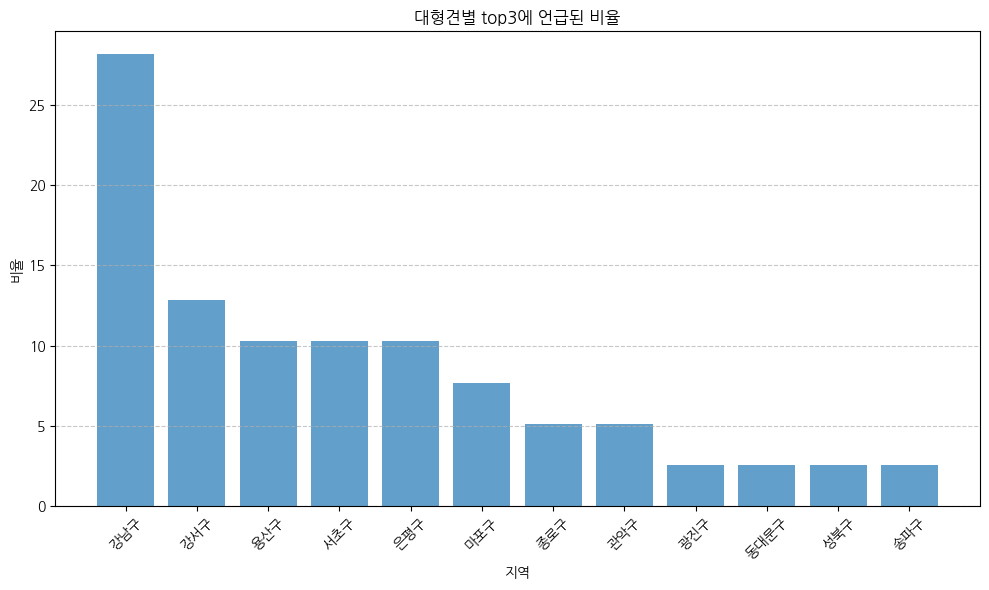

In [8]:

sorted_df = df.sort_values(by="Percentage", ascending=False)
sorted_districts = sorted_df["District"]
sorted_percentages = sorted_df["Percentage"]

plt.figure(figsize=(10, 6))
plt.bar(sorted_districts, sorted_percentages, alpha=0.7)
plt.title("대형견별 top3에 언급된 비율")
plt.xlabel("지역")
plt.ylabel("비율")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd


data = {
    "District": [
        "강남구", "강동구", "강북구", "강서구", "관악구", "광진구", "구로구", "금천구", 
        "노원구", "도봉구", "동대문구", "동작구", "마포구", "서대문구", "서초구", 
        "성동구", "성북구", "송파구", "양천구", "영등포구", "용산구", "은평구", 
        "종로구", "중구", "중랑구"
    ],
    "Park_Count": [
        133, 74, 56, 151, 77, 43, 62, 52, 4, 71, 48, 52, 89, 55, 137, 48, 53, 140, 96, 
        50, 48, 101, 43, 38, 58
    ]
}


total_parks = 2984
df = pd.DataFrame(data)
df["Park_Ratio"] = df["Park_Count"] / total_parks * 100
df = df.sort_values(by="Park_Ratio", ascending=False)

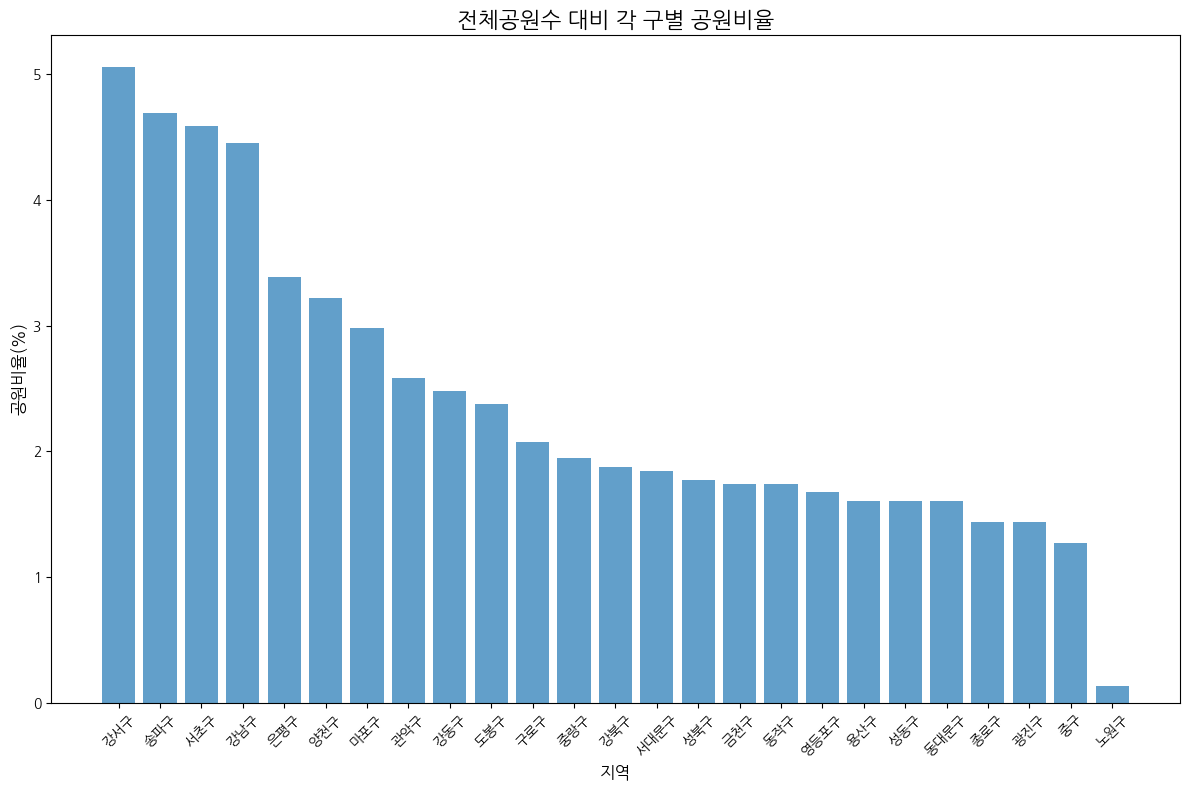

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plt.bar(df["District"], df["Park_Ratio"], alpha=0.7)
plt.title("전체공원수 대비 각 구별 공원비율", fontsize=16)
plt.xlabel("지역", fontsize=12)
plt.ylabel("공원비율(%)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


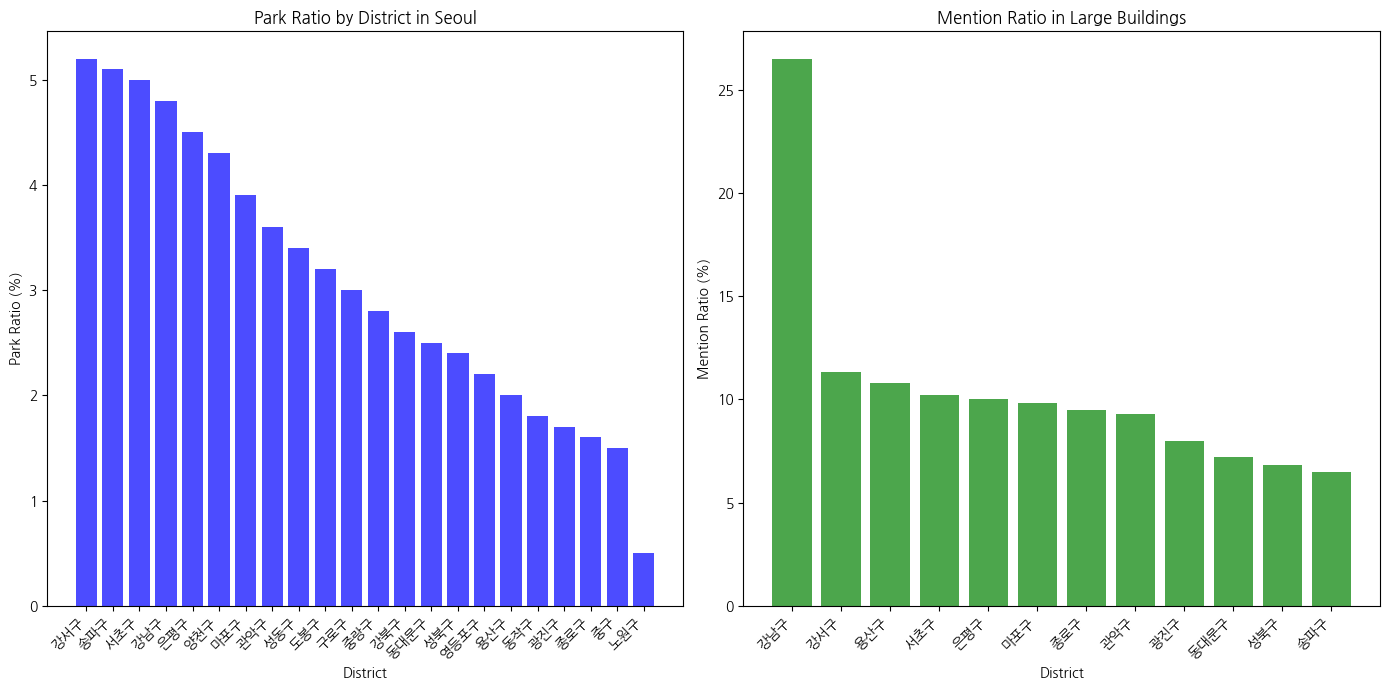

In [14]:
import matplotlib.pyplot as plt
import numpy as np


districts1 = [
    "강서구", "송파구", "서초구", "강남구", "은평구", "양천구", "마포구", "관악구", "성동구", "도봉구",
    "구로구", "중랑구", "강북구", "동대문구", "성북구", "영등포구", "용산구", "동작구", "광진구", "종로구", "중구", "노원구"
]
park_ratios = [
    5.2, 5.1, 5.0, 4.8, 4.5, 4.3, 3.9, 3.6, 3.4, 3.2, 3.0, 2.8, 2.6, 2.5, 2.4, 2.2, 2.0, 1.8, 1.7, 1.6, 1.5, 0.5
]
districts2 = [
    "강남구", "강서구", "용산구", "서초구", "은평구", "마포구", "종로구", "관악구", "광진구", "동대문구", "성북구", "송파구"
]
mention_ratios = [
    26.5, 11.3, 10.8, 10.2, 10.0, 9.8, 9.5, 9.3, 8.0, 7.2, 6.8, 6.5
]
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.bar(districts1, park_ratios, alpha=0.7, color='blue')
plt.title('Park Ratio by District in Seoul')
plt.xlabel('District')
plt.ylabel('Park Ratio (%)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
plt.bar(districts2, mention_ratios, alpha=0.7, color='green')
plt.title('Mention Ratio in Large Buildings')
plt.xlabel('District')
plt.ylabel('Mention Ratio (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


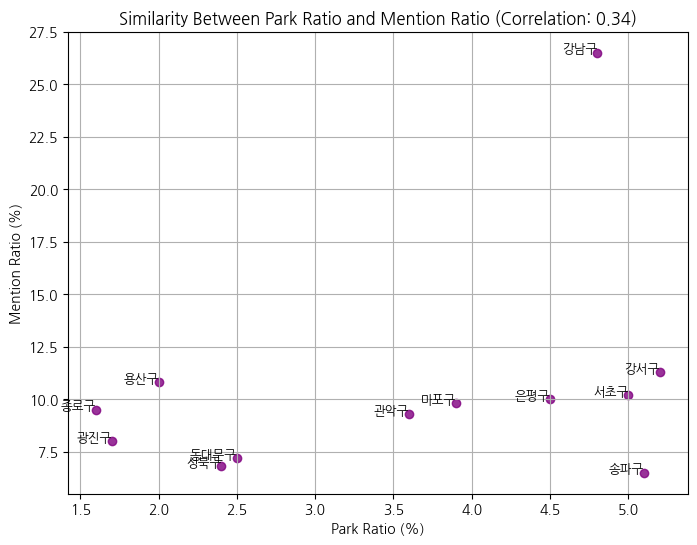

In [17]:
from scipy.stats import pearsonr


common_districts = list(set(districts1) & set(districts2))
park_ratios_common = [park_ratios[districts1.index(d)] for d in common_districts]
mention_ratios_common = [mention_ratios[districts2.index(d)] for d in common_districts]
correlation, _ = pearsonr(park_ratios_common, mention_ratios_common)


plt.figure(figsize=(8, 6))
plt.scatter(park_ratios_common, mention_ratios_common, alpha=0.8, color='purple')
for i, district in enumerate(common_districts):
    plt.text(park_ratios_common[i], mention_ratios_common[i], district, fontsize=9, ha='right')

plt.title(f'Similarity Between Park Ratio and Mention Ratio (Correlation: {correlation:.2f})')
plt.xlabel('Park Ratio (%)')
plt.ylabel('Mention Ratio (%)')
plt.grid(True)
plt.show()


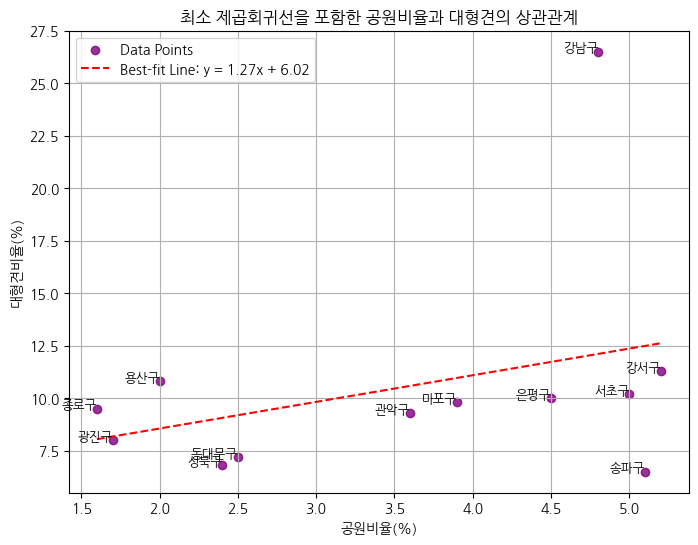

In [20]:
import numpy as np


coefficients = np.polyfit(park_ratios_common, mention_ratios_common, 1)
slope, intercept = coefficients
x_vals = np.linspace(min(park_ratios_common), max(park_ratios_common), 100)
y_vals = slope * x_vals + intercept
plt.figure(figsize=(8, 6))
plt.scatter(park_ratios_common, mention_ratios_common, alpha=0.8, color='purple', label='Data Points')
plt.plot(x_vals, y_vals, color='red', linestyle='--', label=f'Best-fit Line: y = {slope:.2f}x + {intercept:.2f}')
for i, district in enumerate(common_districts):
    plt.text(park_ratios_common[i], mention_ratios_common[i], district, fontsize=9, ha='right')

plt.title('최소 제곱회귀선을 포함한 공원비율과 대형견의 상관관계')
plt.xlabel('공원비율(%)')
plt.ylabel('대형견비율(%)')
plt.legend()
plt.grid(True)
plt.show()
